In [1]:
import time
import numpy as np
import scipy
from regions import CircleSkyRegion
from astropy.io import fits
from astropy import wcs
import astropy.units as u
from astropy.stats import sigma_clip
from astropy.utils.data import download_file
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from spectral_cube import SpectralCube
from astropy.convolution import Gaussian2DKernel
import aplpy  


plt.rcParams['font.size'] =35
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] =35
plt.rcParams['legend.fontsize'] = 35
plt.rcParams['figure.titlesize'] = 35
plt.rcParams['axes.labelweight']='heavy'
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

RA = 166.6932042    #ALMA
Dec =-77.3758000  #ALMA

5.335224099351852 5.345113300648149
5.333246259092593 5.335224099351852
5.345113300648149 5.347091140907408


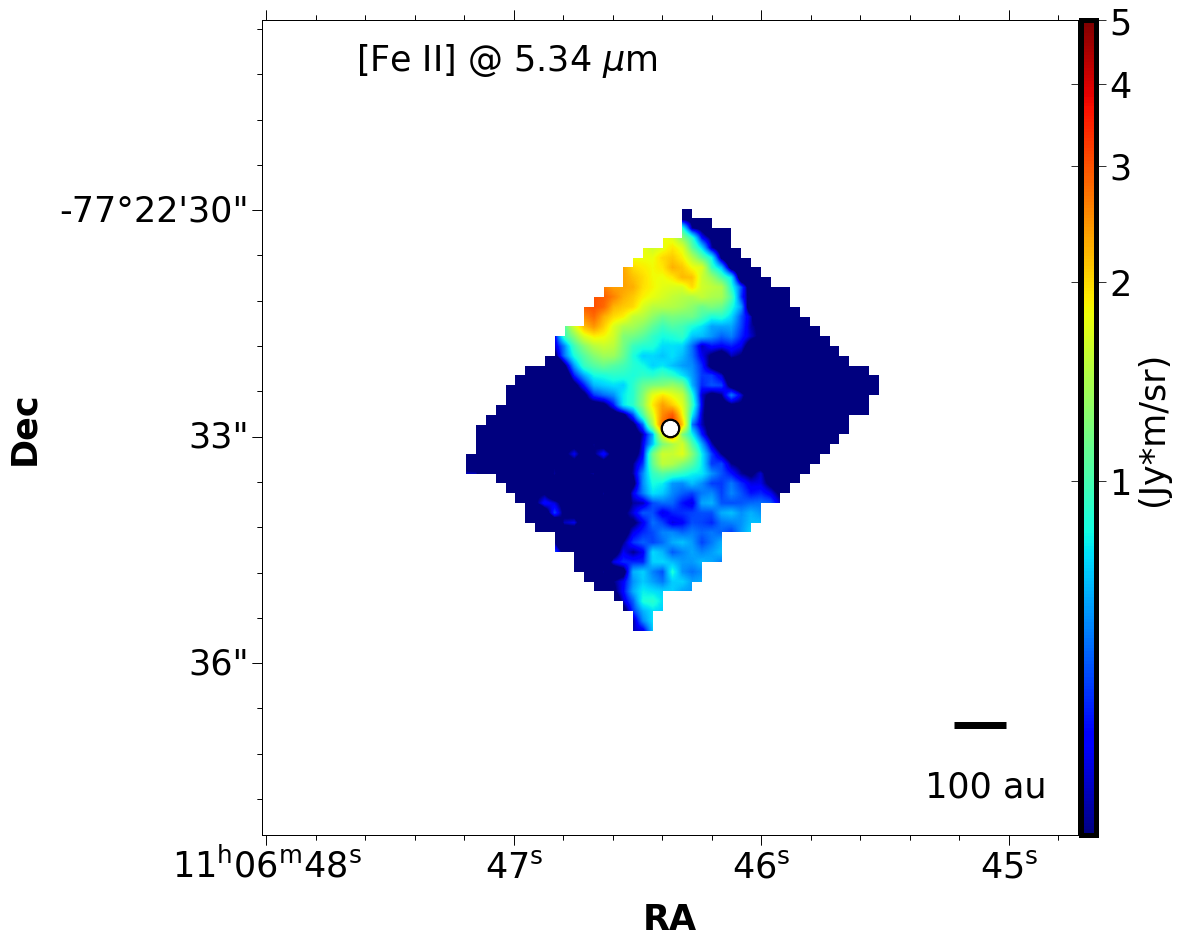

In [2]:
filename = "Level3_ch1-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    


cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  


H1=5.3401687




w1=(1-(2.5/res))*H1
w2=(1+(2.5/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=(1-(3.5/res))*H1
w2=(1-(2.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=(1+(2.5/res))*H1
w2=(1+(3.5/res))*H1
print(w1,w2)
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Fe_534.fits',overwrite=True)

name='[Fe II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.3,vmax=5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=3))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)

fig.savefig(str(name)+'_534.png')



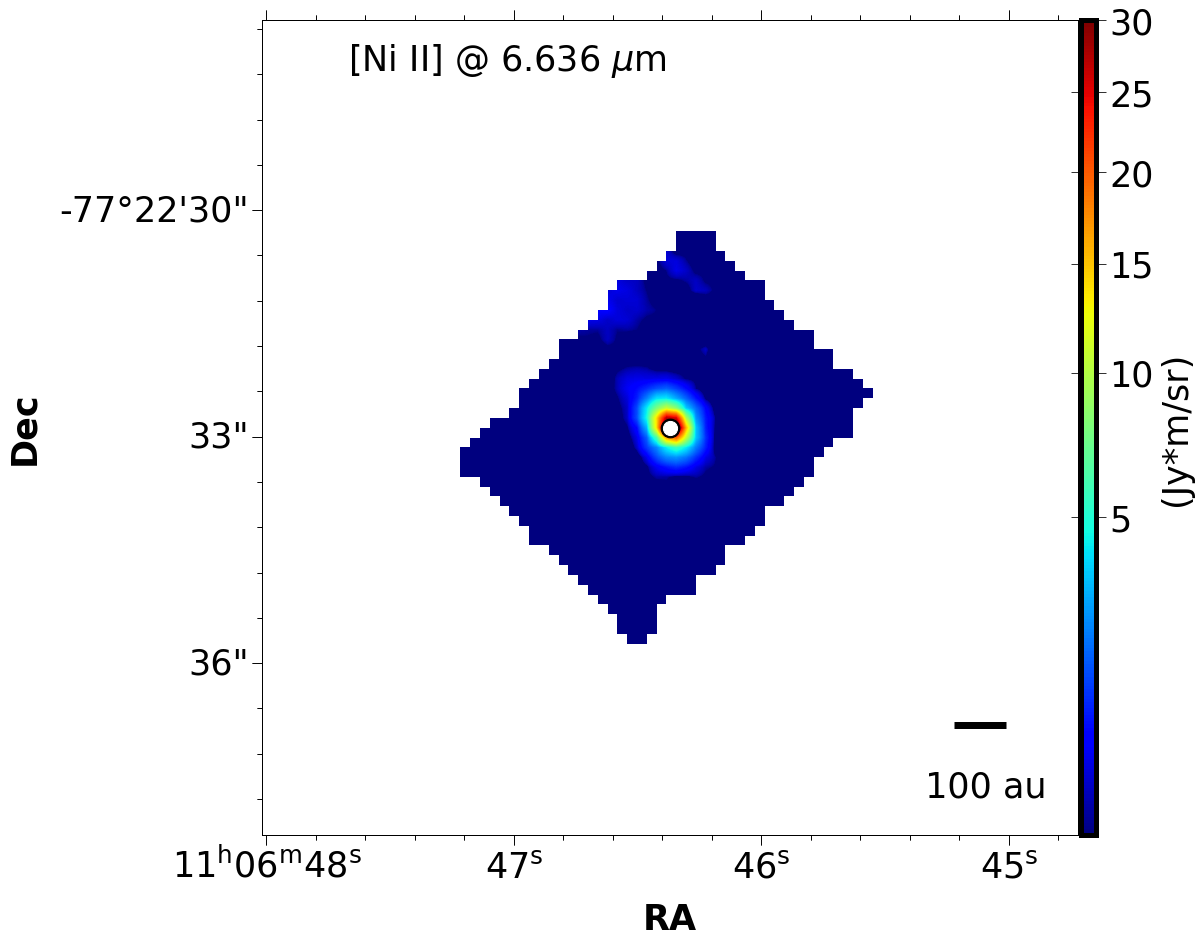

In [3]:
filename = "Level3_ch1-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

    
H1=6.636

w1=(1-(2.5/res))*H1
w2=(1+(2.5/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(3.5/res))*H1
w2=(1-(2.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2.5/res))*H1
w2=(1+(3.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Ni_664.fits',overwrite=True)

name='[Ni II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.5,vmax=30,stretch ='sqrt',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=3))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)

fig.savefig(str(name)+'664_.png')



6.979 6.99
6.975 6.979
6.99 7.01


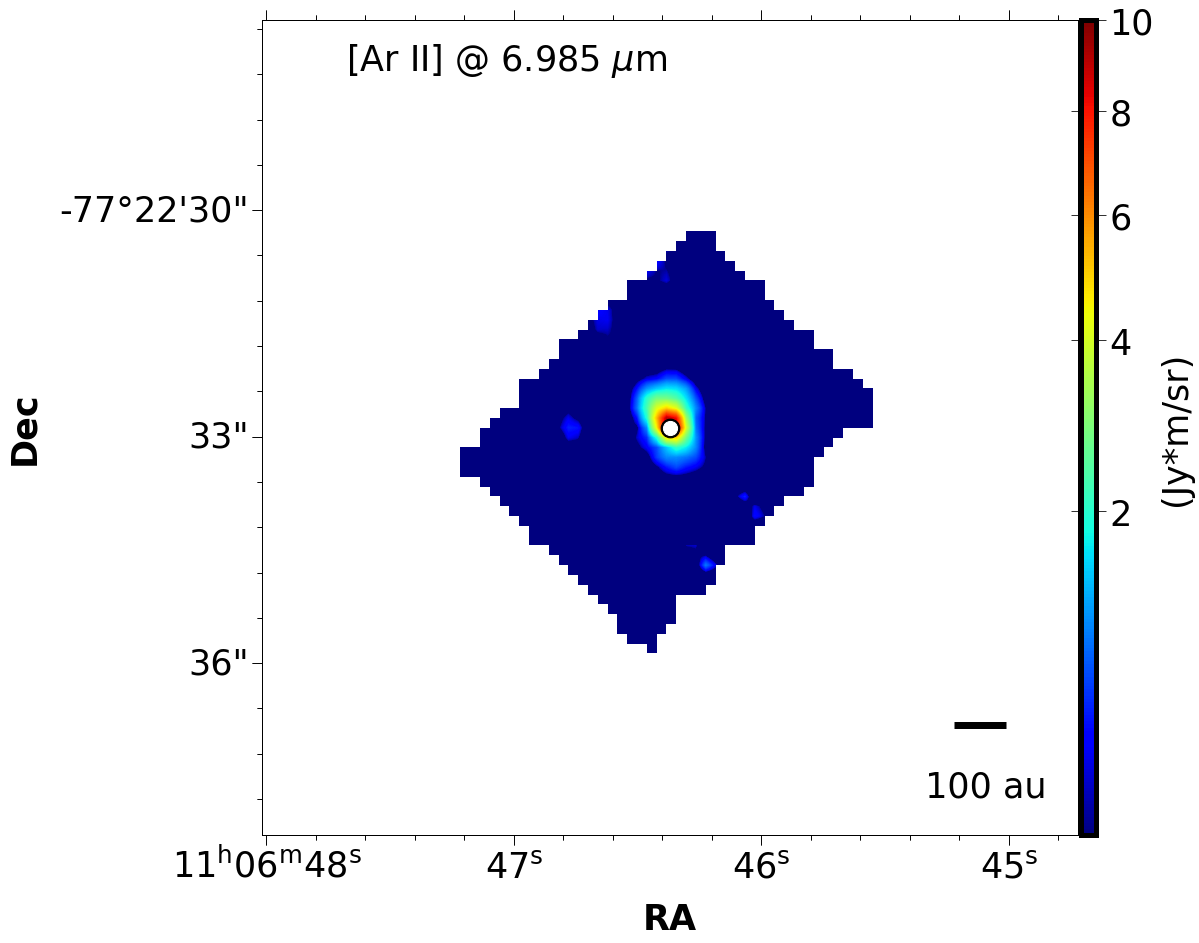

In [4]:
filename = "Level3_ch1-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

H1=6.9852746
w1=6.979
w2=6.99
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=6.975
w2=6.979
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=6.99
w2=7.01
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  
print(w1,w2)
med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Ar_699.fits',overwrite=True)

name='[Ar II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.5,vmax=10,stretch ='sqrt',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=3))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)
fig.savefig(str(name)+'.png')



6.715 6.722
6.6997 6.71
6.726 6.732


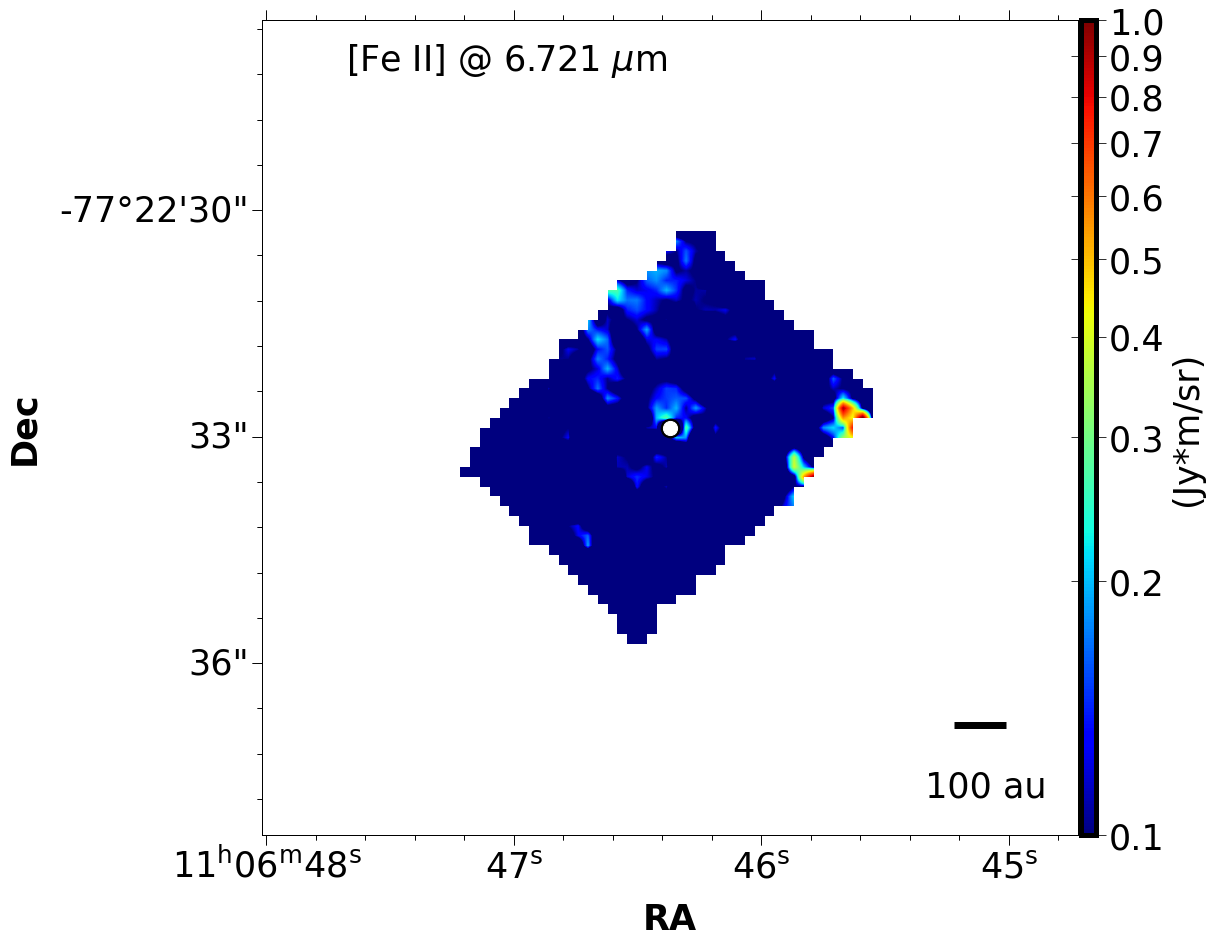

In [5]:
filename = "Level3_ch1-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

H1=6.7212748

w1= 6.715
w2=6.722
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=6.6997
w2=6.71
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=6.726
w2=6.732
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  
print(w1,w2)
med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Fe_672.fits',overwrite=True)

name='[Fe II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.1,vmax=1,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=3))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)
fig.savefig(str(name)+'.png')



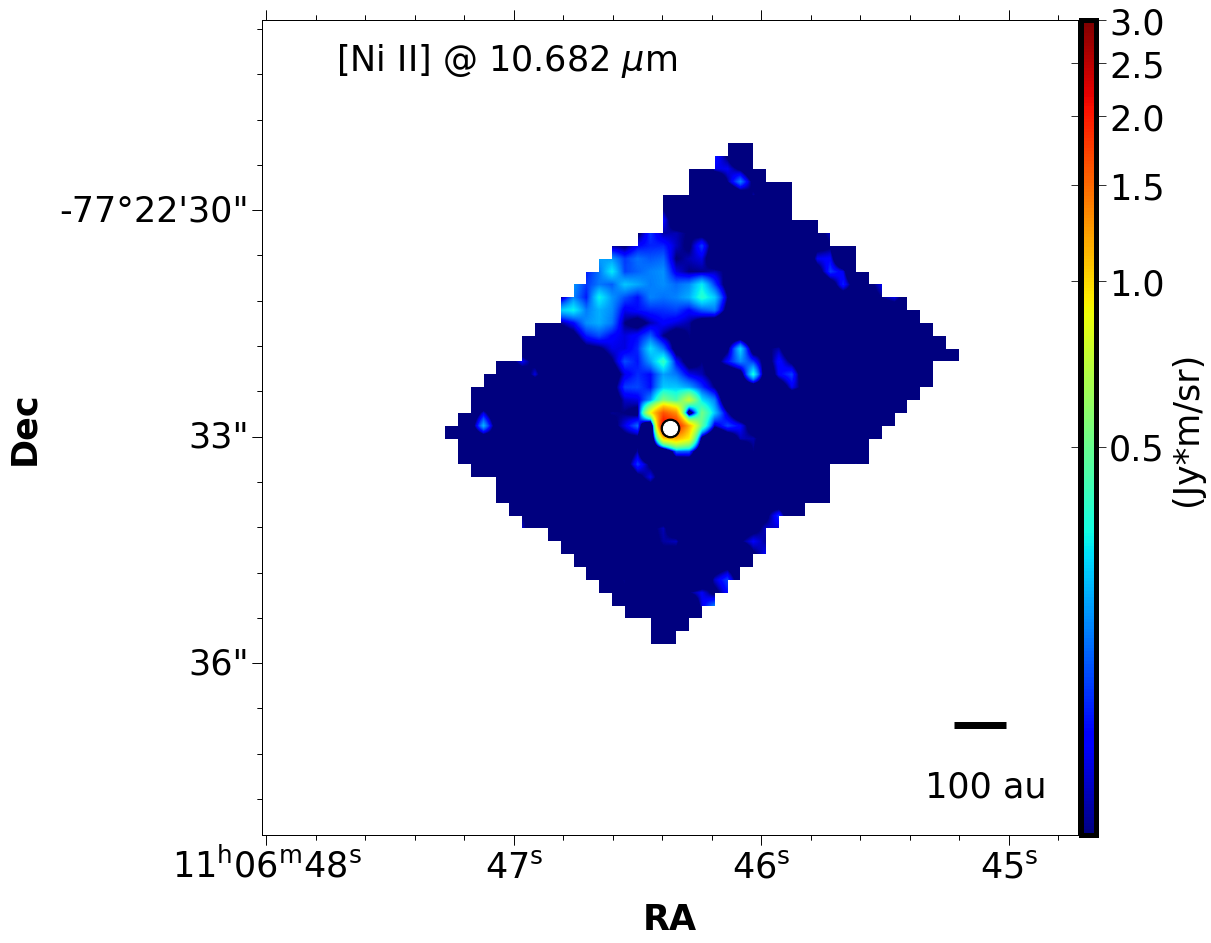

In [6]:
filename = "Level3_ch2-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)
from spectral_cube import SpectralCube
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  



res=2700
    

    
H1=10.6822

w1=(1-(2./res))*H1
w2=(1+(2./res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(3/res))*H1
w2=(1-(2./res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2./res))*H1
w2=(1+(3/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Ni_106.fits',overwrite=True)

name='[Ni II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.1,vmax=3,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.3, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=3))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)
fig.savefig(str(name)+'106_.png')



12.8 12.828
12.79 12.798
12.829 12.831


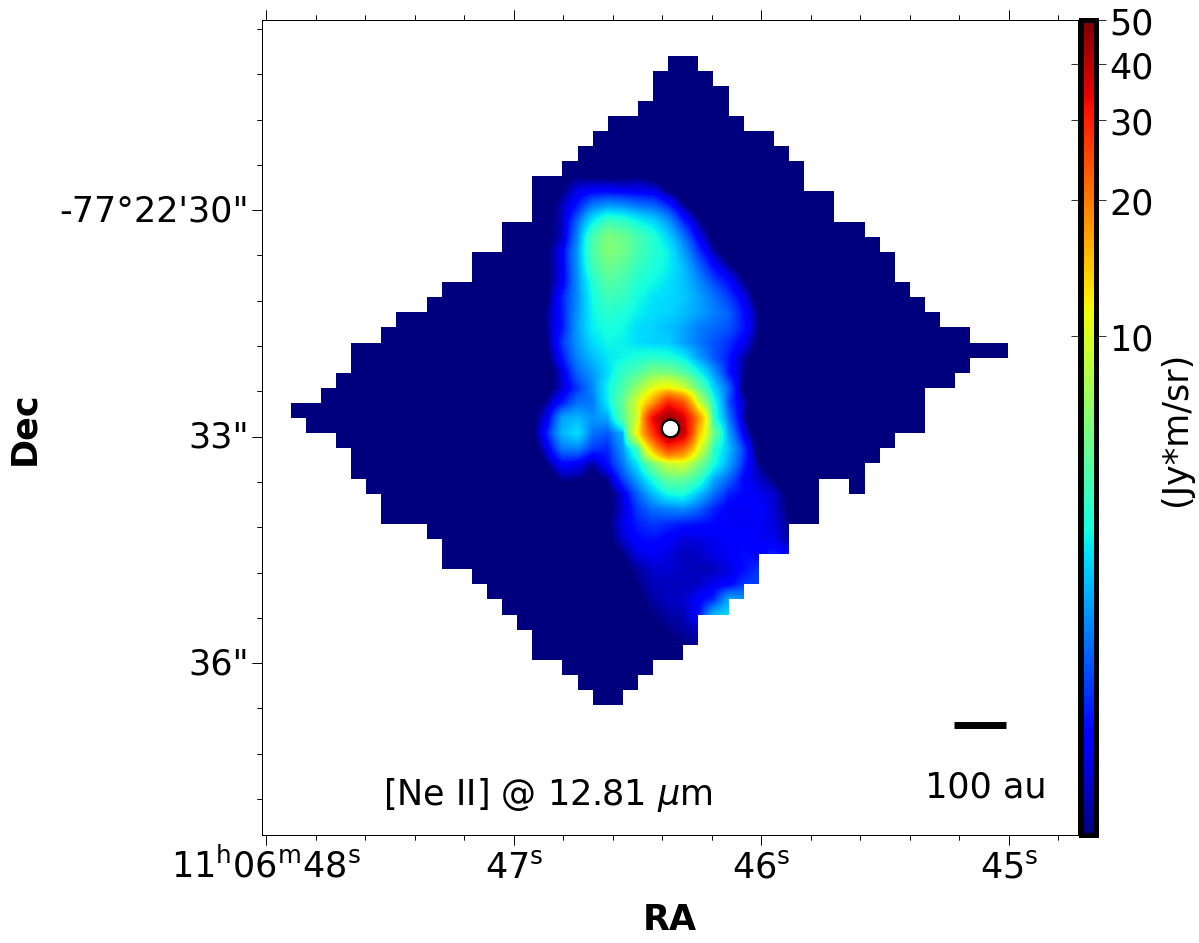

In [7]:
filename = "Level3_ch3-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  
 
H1=12.8135475

w1=12.8
w2=12.828
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=12.79
w2=12.798
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=12.829
w2=12.831
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  
print(w1,w2)
med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Ne.fits',overwrite=True)

name='[Ne II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.8,vmax=50,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.35, 0.05, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)
fig.savefig(str(name)+'.png')



17.92 17.953
17.85 17.91
17.954 18.0


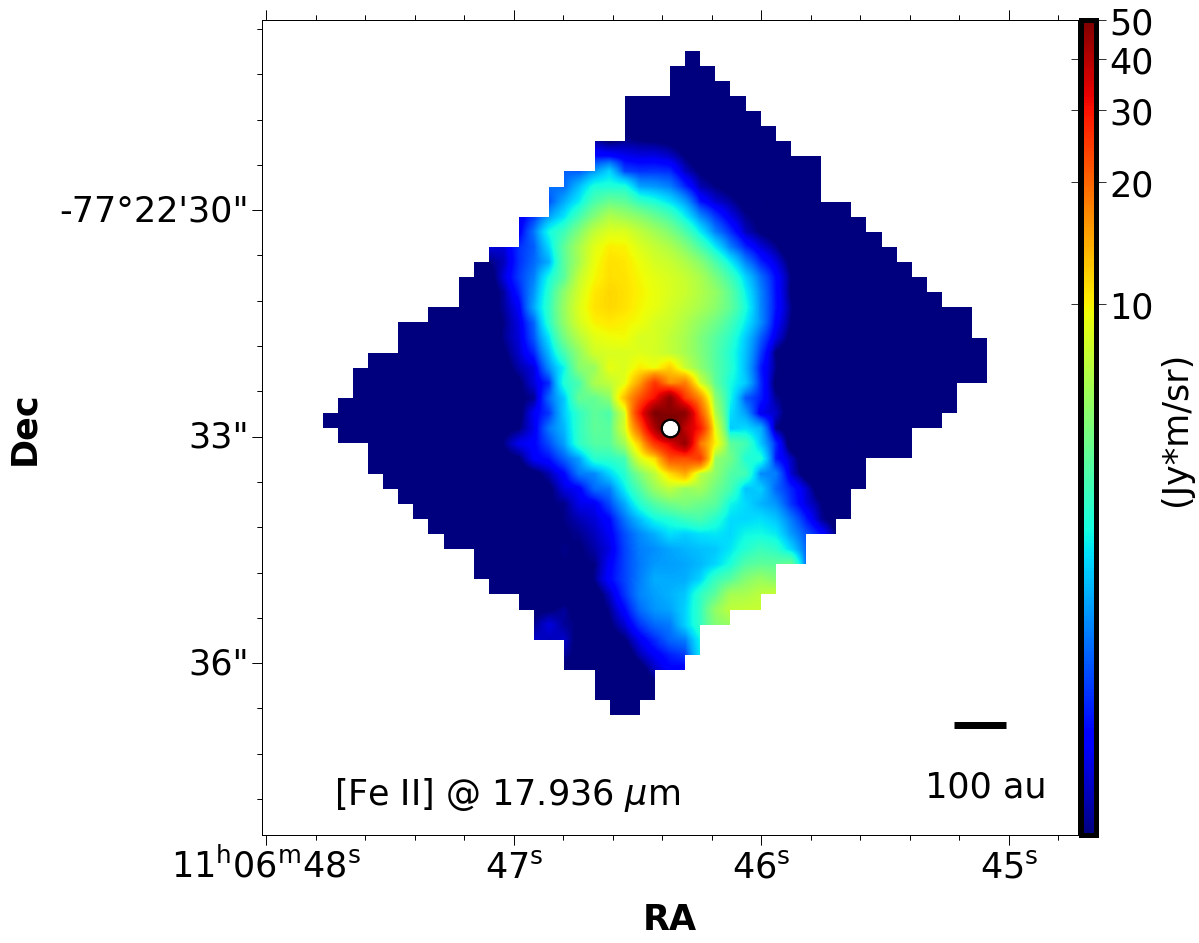

In [8]:
filename = "Level3_ch3-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

    
H1=17.9360294

w1=17.92
w2=17.953
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=17.85
w2=17.91
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=17.954
w2=18.0
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  
print(w1,w2)
med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Fe_17.fits',overwrite=True)

name='[Fe II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.5,vmax=50,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.3, 0.05, str(name) + ' @ '+str(np.around(H1,decimals=3))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)
fig.savefig(str(name)+'_17.png')



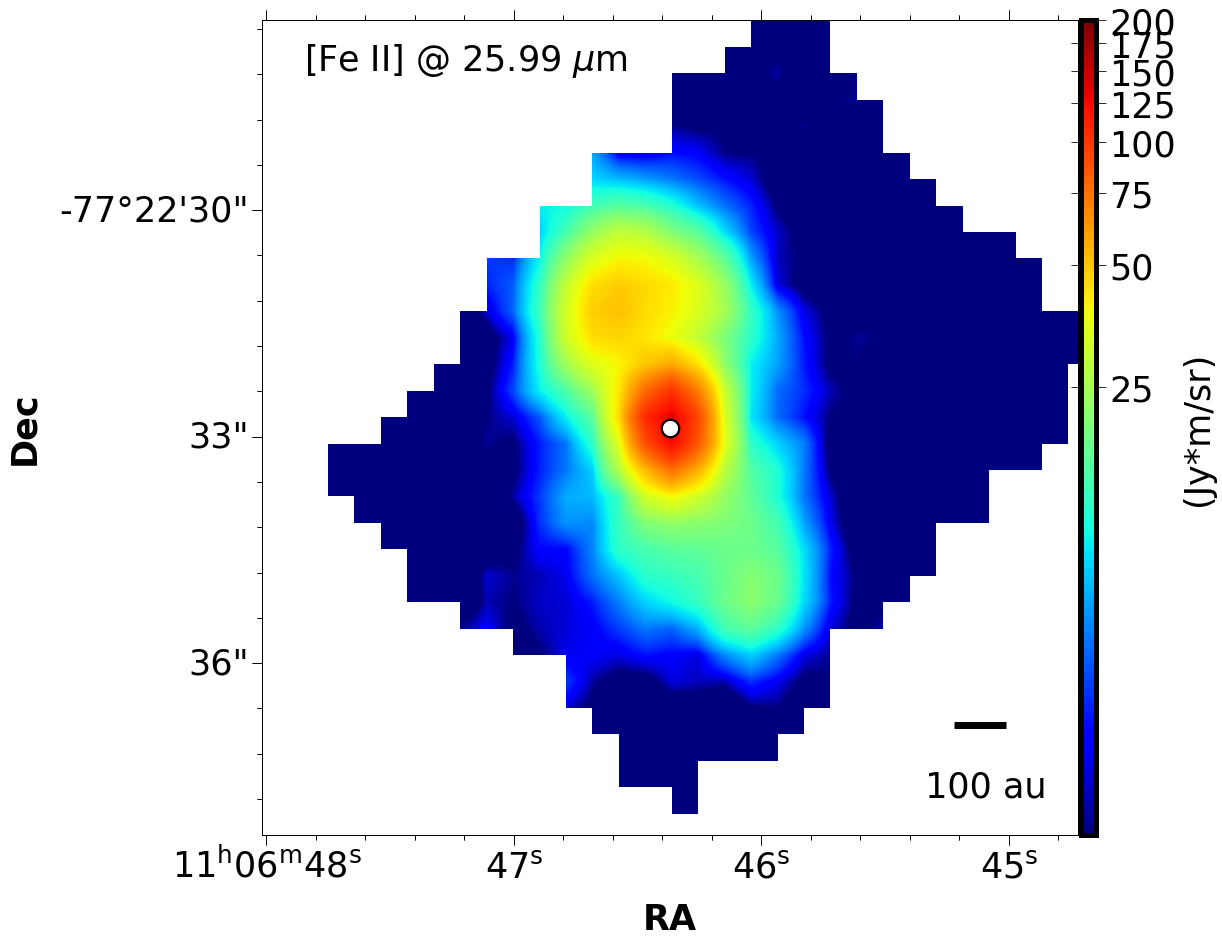

In [9]:
filename = "Level3_ch4-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

    
H1=25.988404

w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Fe_26.fits',overwrite=True)

name='[Fe II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=2,vmax=200,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.25, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)
fig.savefig(str(name)+'_26.png')



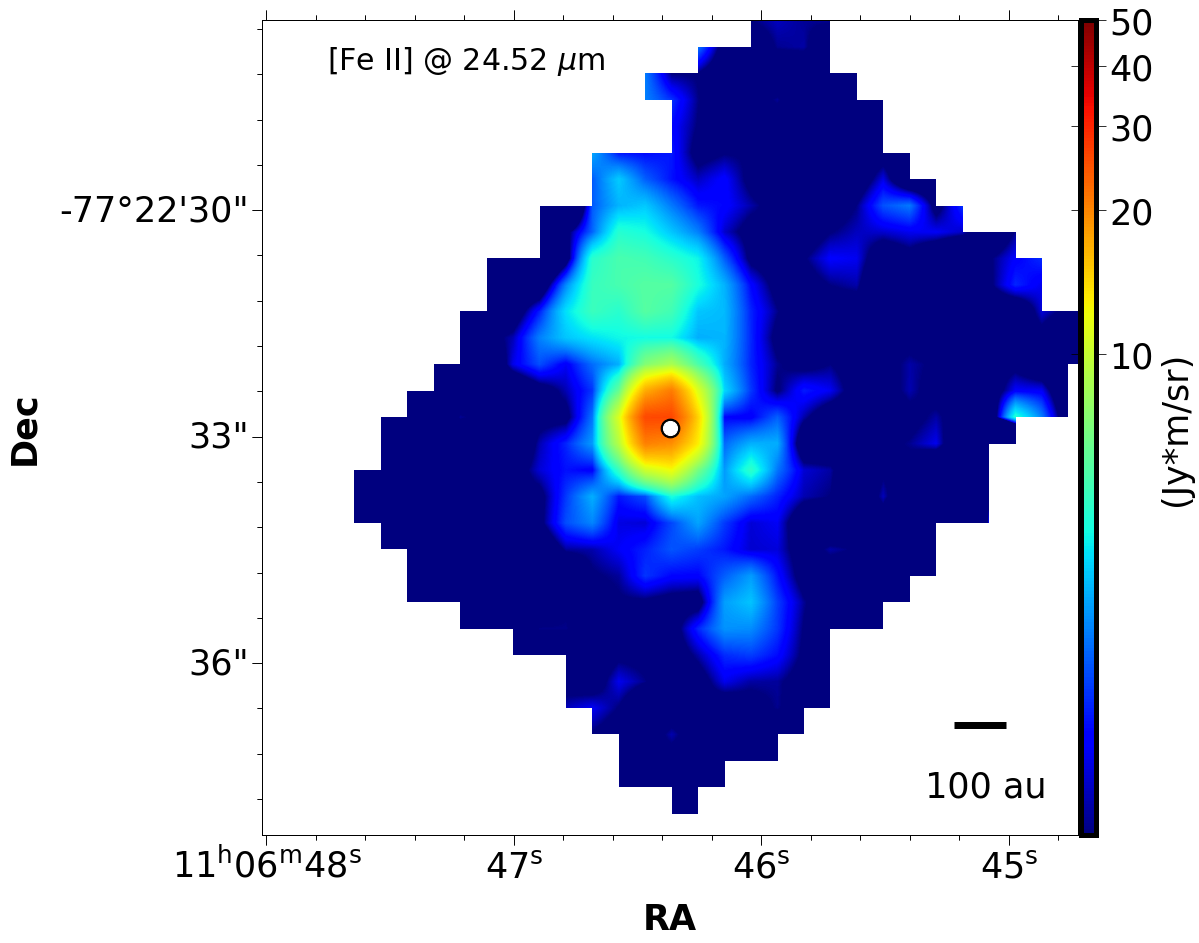

In [10]:
filename = "Level3_ch4-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

    
H1=24.5191789

w1=24.485
w2=24.55
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=24.475
w2=24.485
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=24.55
w2=24.56
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('Fe_24.fits',overwrite=True)

name='[Fe II]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=1,vmax=50,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.25, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=2))+' $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.003, height=0.003)
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)
fig.savefig(str(name)+'_24.png')



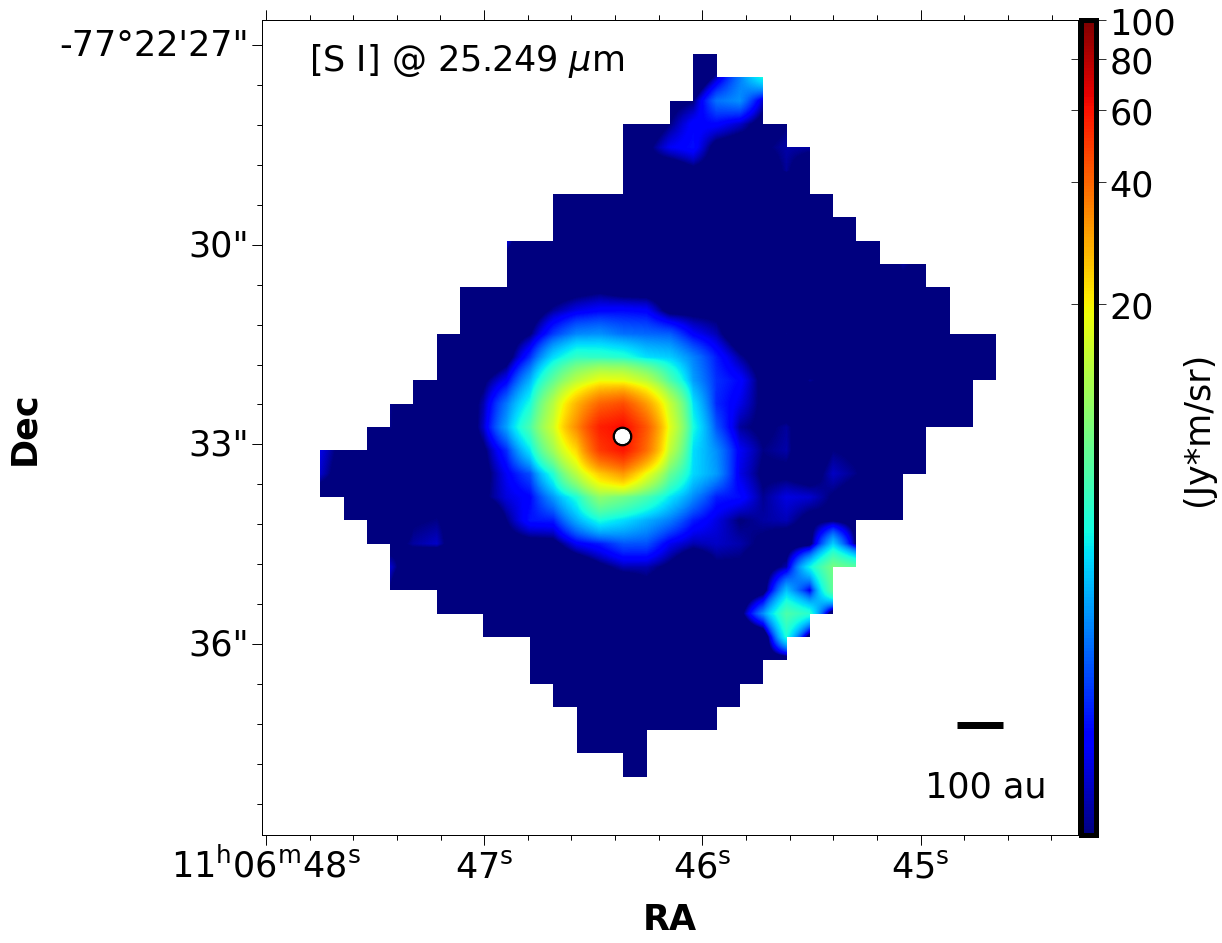

In [11]:
filename = "Level3_ch4-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  

    
H1=25.2490184


w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)

w1=(1-(4/res))*H1
w2=(1-(2/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  

w1=(1+(2/res))*H1
w2=(1+(4/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1
moment_0 = sub_f.moment(order=0) 

moment_0.write('S_I.fits',overwrite=True)

name='[S I]'

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=1,vmax=100,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
fig.add_colorbar()
fig.colorbar.set_axis_label_text('(Jy*m/sr)')
fig.add_label(0.25, 0.95, str(name) + ' @ '+str(np.around(H1,decimals=3))+' $\mu$m', relative=True,c='k',size=35)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.ticks.set_xspacing(15/3600)
fig.show_markers(RA, Dec, c='k',s=350)
fig.show_markers(RA, Dec, c='w',s=200)
fig.savefig(str(name)+'.png')



5.3369052635722225 5.343629920453704
5.333246259092593 5.335224099351852
5.345113300648149 5.347091140907408


0 0 0
0 1 1
0 2 2
1 0 3
1 1 4
1 2 5
2 0 6


2 1 7
2 2 8


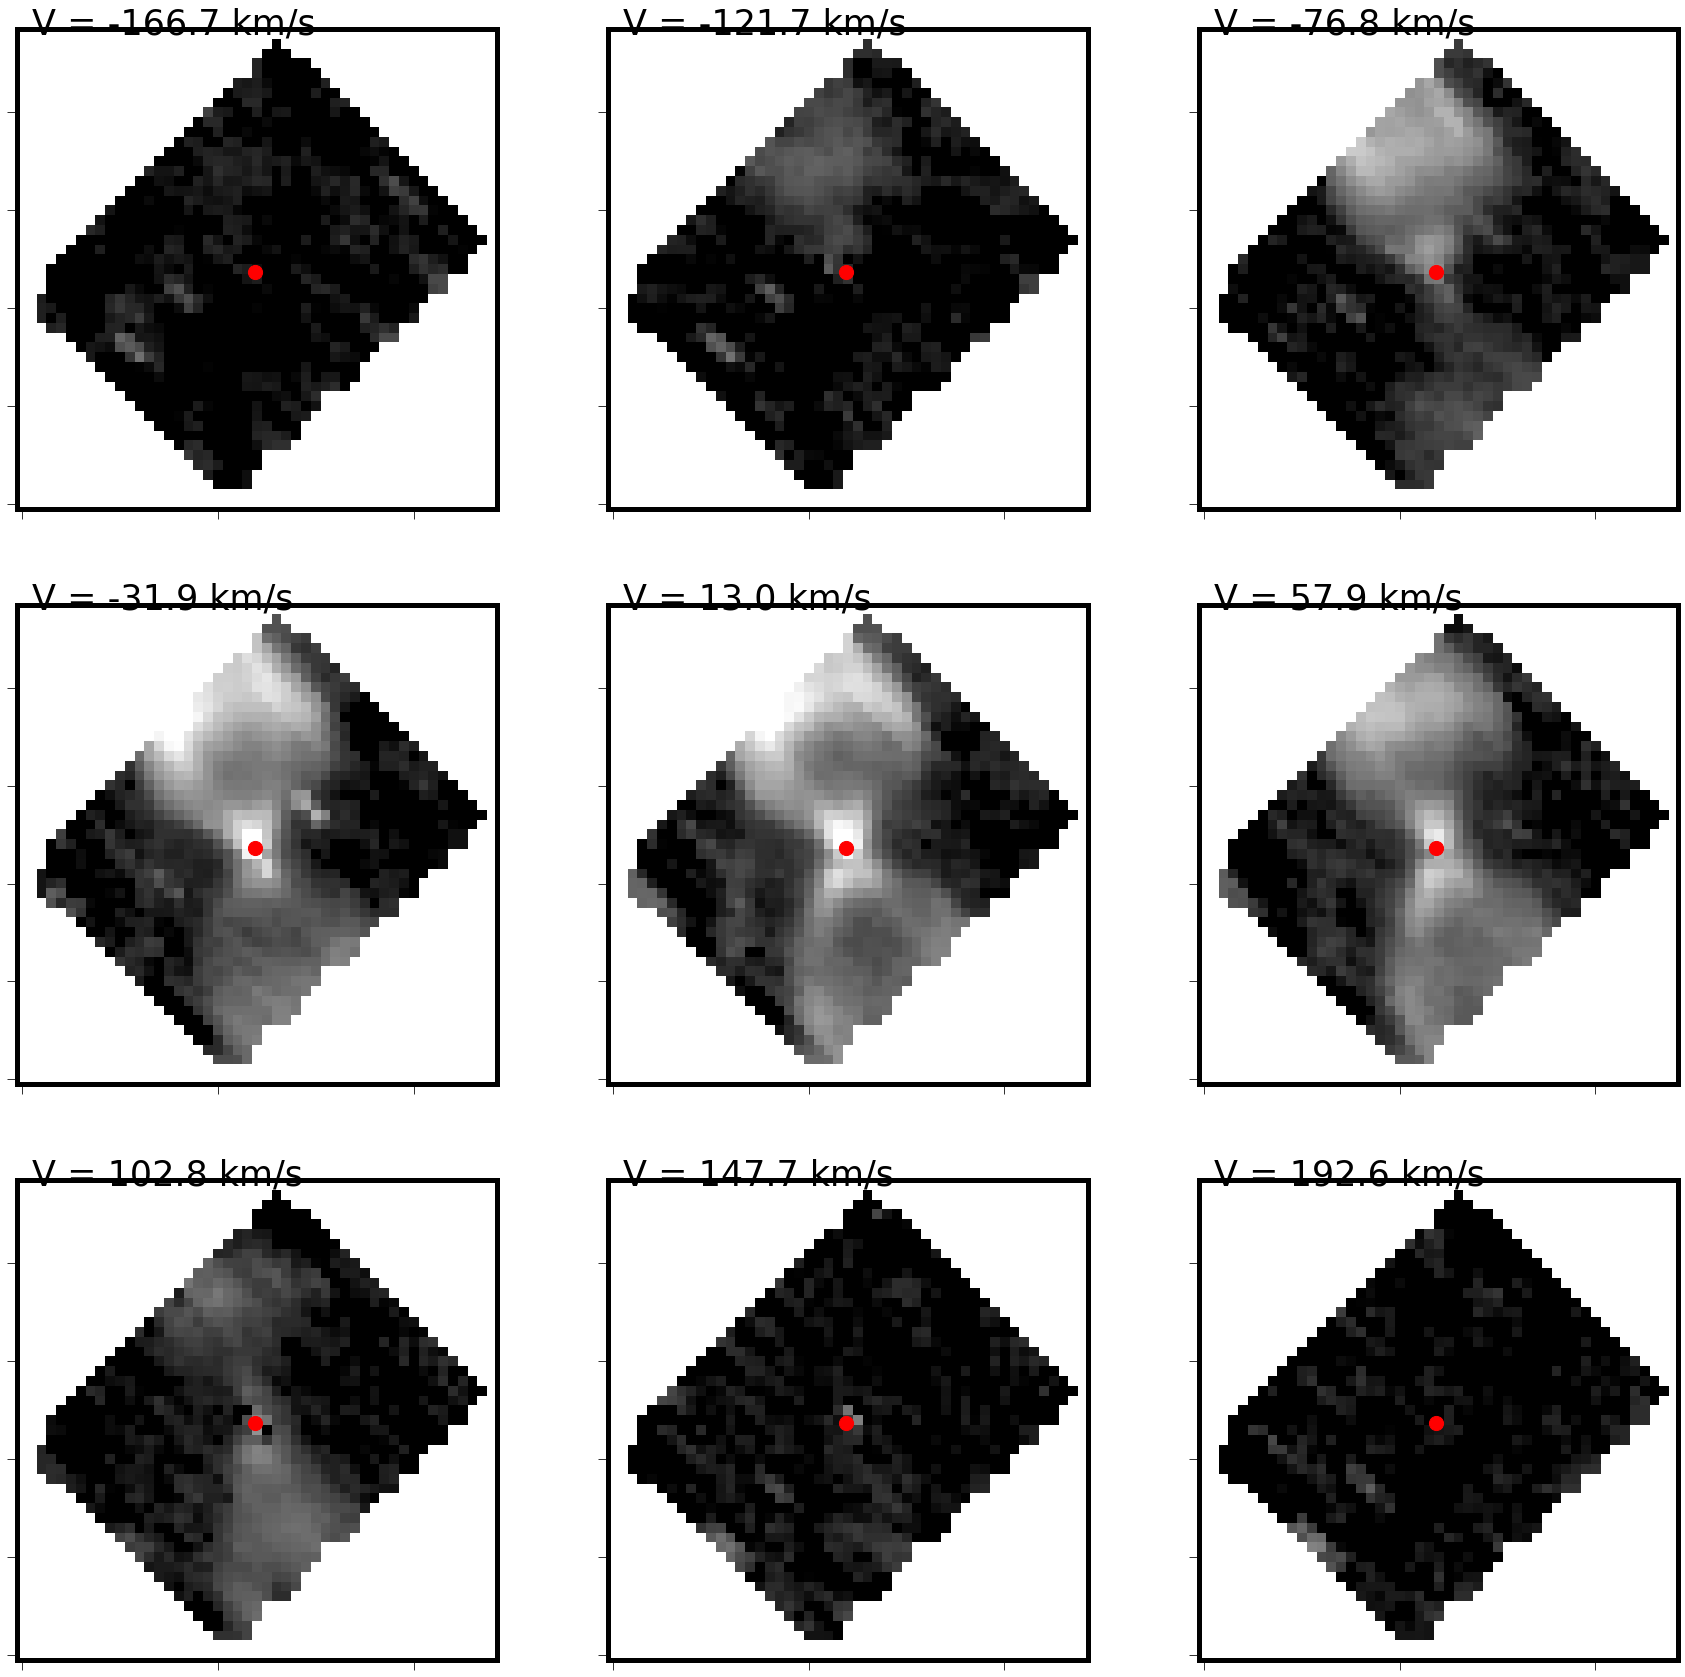

In [12]:
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from astropy.wcs import WCS
from astropy.visualization.stretch import SinhStretch, LinearStretch
from astropy.visualization import ImageNormalize

from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)

filename = "Level3_ch1-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
xpix, ypix,zpix = w.wcs_world2pix(RA, Dec,5.34,0)

cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  


H1=5.3401687



w1=(1-(1.65/res))*H1
w2=(1+(1.75/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=(1-(3.5/res))*H1
w2=(1-(2.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=(1+(2.5/res))*H1
w2=(1+(3.5/res))*H1
print(w1,w2)
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)

ww=subcube.spectral_axis  

med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1


new_mask2= sub_f <1e-3* u.MJy / u.sr 

mask_inverse = ~new_mask2  

#sub_f=sub_f.with_mask(mask_inverse).with_fill_value(1e-3)

vel=((ww.to_value()-H1)/(H1))*299792
wcs1 = WCS(sub_f.header)[0]





fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))




# Create an ImageNormalize object using a SqrtStretch object
norm = ImageNormalize(vmin=10,vmax=1000,stretch=SqrtStretch())



i=0
k=0

while(i<3):
    j=0
    while(j<3):
            channel = sub_f[k, :, :].to_value()
            print(i,j,k)
            ax = axs[i, j]
            im = ax.imshow(channel, origin='lower', cmap='gray',norm=norm)
            ax.text(1,48,'V = {:.1f} km/s'.format(vel[k]))
            ax.scatter(xpix, ypix,c='r',s=200)
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            j=j+1
            k=k+1
    i=i+1
        
plt.show()




5.3369052635722225 5.343629920453704
5.333246259092593 5.335224099351852
5.345113300648149 5.347091140907408
0 0 0


0 1 1
0 2 2
1 0 3
1 1 4
1 2 5
2 0 6
2 1 7


2 2 8


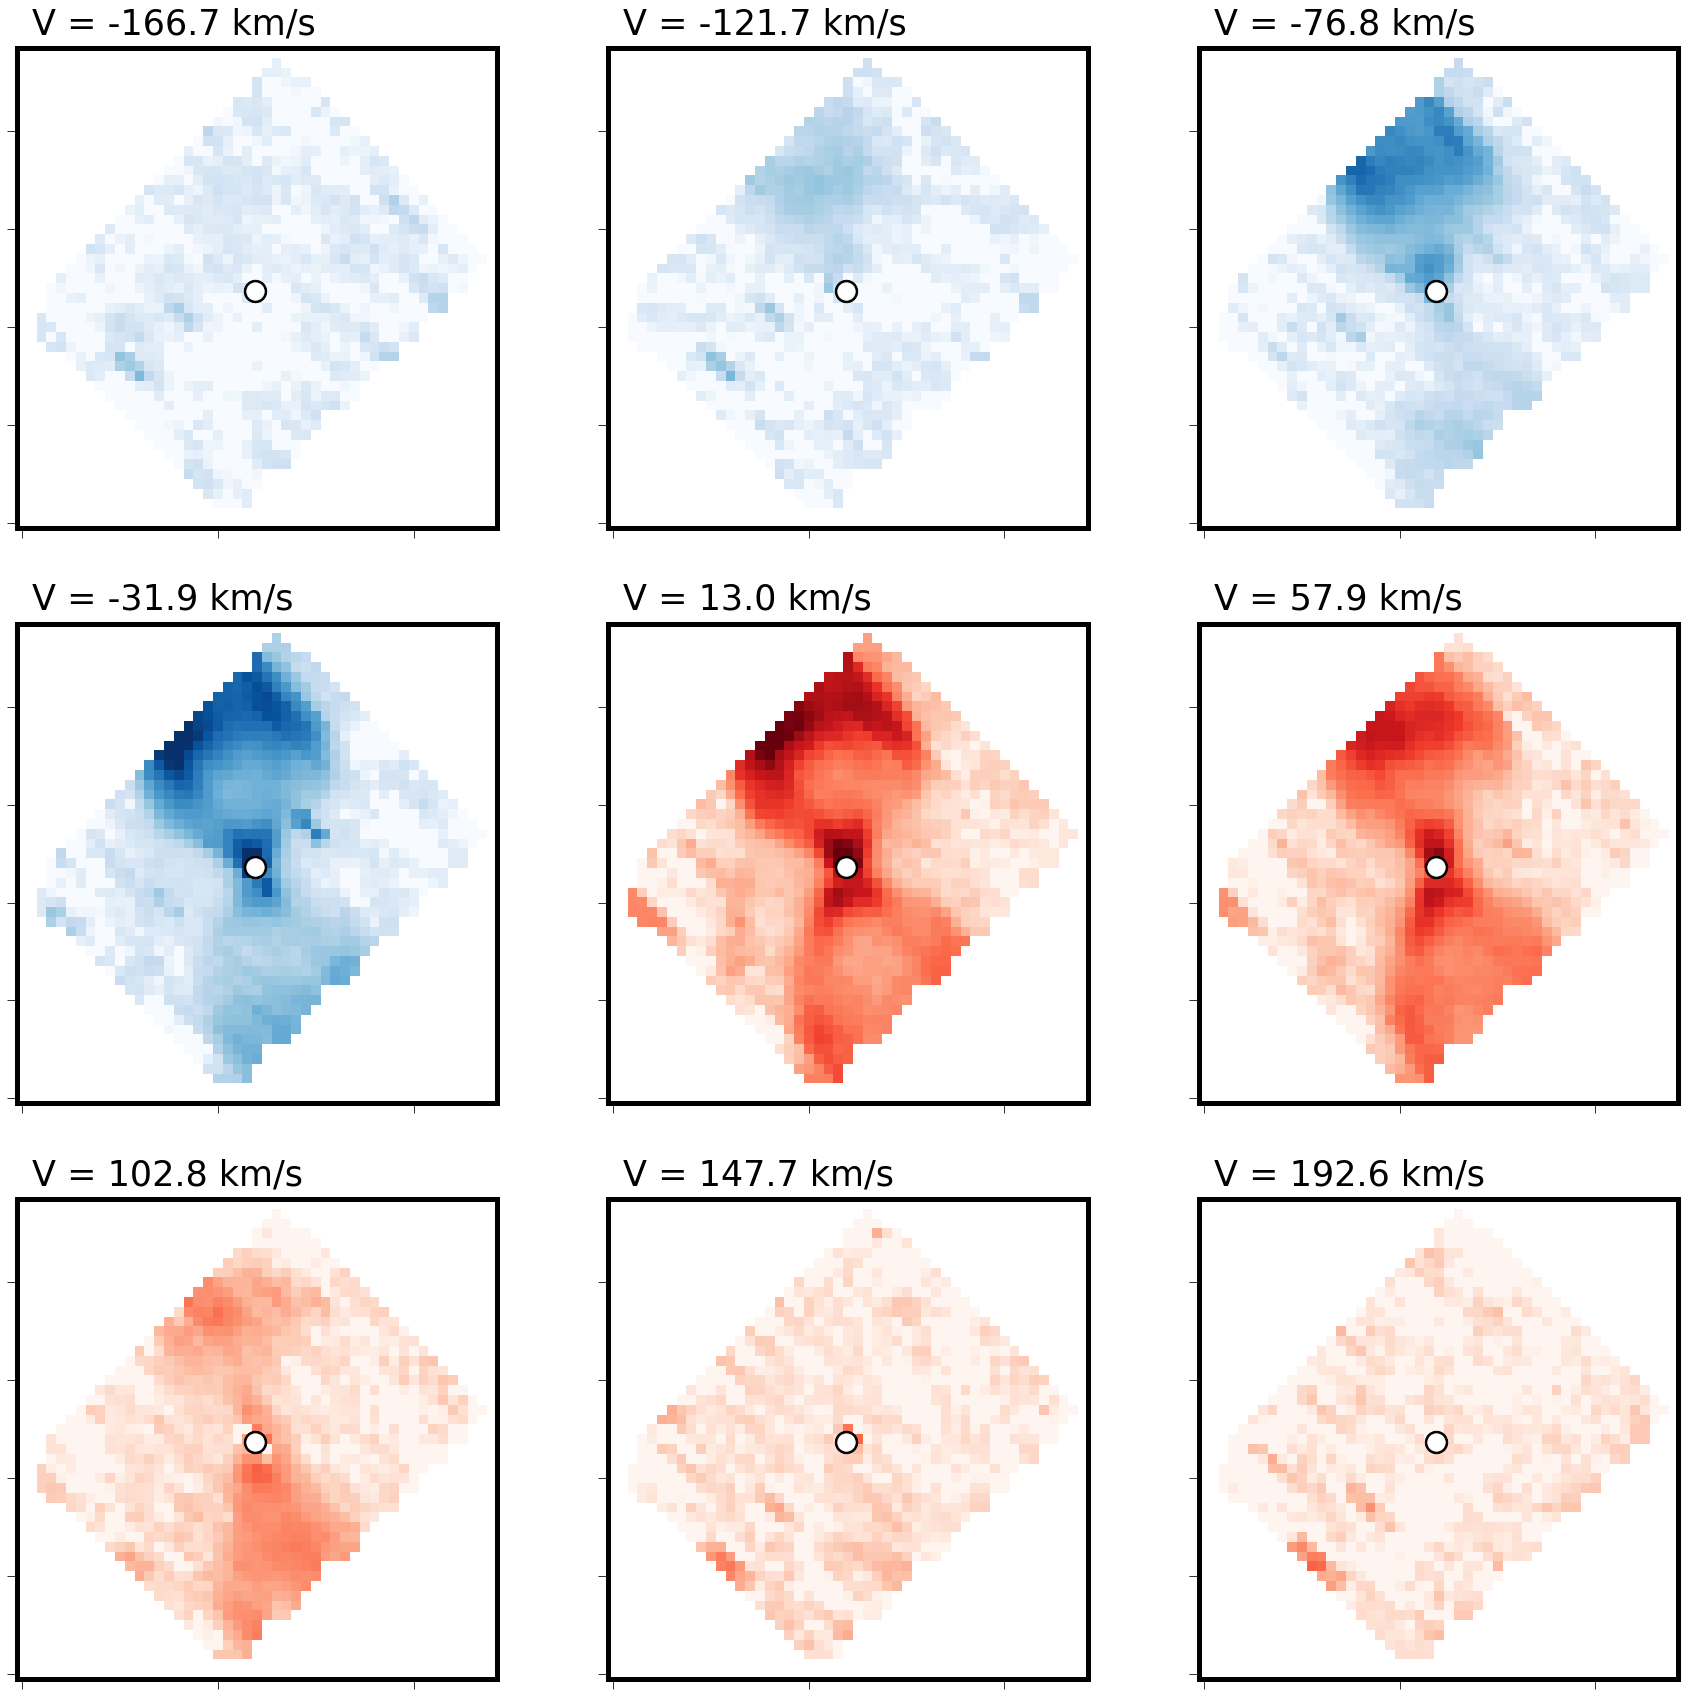

In [13]:
from matplotlib.colors import LogNorm
filename = "Level3_ch1-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    


cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  


H1=5.3401687




w1=(1-(1.65/res))*H1
w2=(1+(1.75/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=(1-(3.5/res))*H1
w2=(1-(2.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=(1+(2.5/res))*H1
w2=(1+(3.5/res))*H1
print(w1,w2)
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)

ww=subcube.spectral_axis  

med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1

vel=((ww.to_value()-H1)/(H1))*299792

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))

norm = ImageNormalize(vmin=0.1,vmax=1000,stretch=SqrtStretch())

i=0
k=0

while(i<3):
    j=0
    while(j<3):
            channel = sub_f[k, :, :].to_value()
            print(i,j,k)
            ax = axs[i, j]
            if(vel[k]>0):
                im = ax.imshow(channel, origin='lower', cmap='Reds',norm=norm)
            else:
                im = ax.imshow(channel, origin='lower', cmap='Blues',norm=norm)
            
            ax.scatter(xpix, ypix,c='k',s=500)
            ax.scatter(xpix, ypix,c='w',s=300)
            ax.text(1,50,'V = {:.1f} km/s'.format(vel[k]))
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            j=j+1
            k=k+1
    i=i+1
        

plt.show()




5.5078152374123395 5.514755245864617
5.504039056342718 5.50608023529927
5.5162861300820305 5.5183273090385825
0 0 0


0 1 1
0 2 2
1 0 3
1 1 4
1 2 5
2 0 6
2 1 7


2 2 8


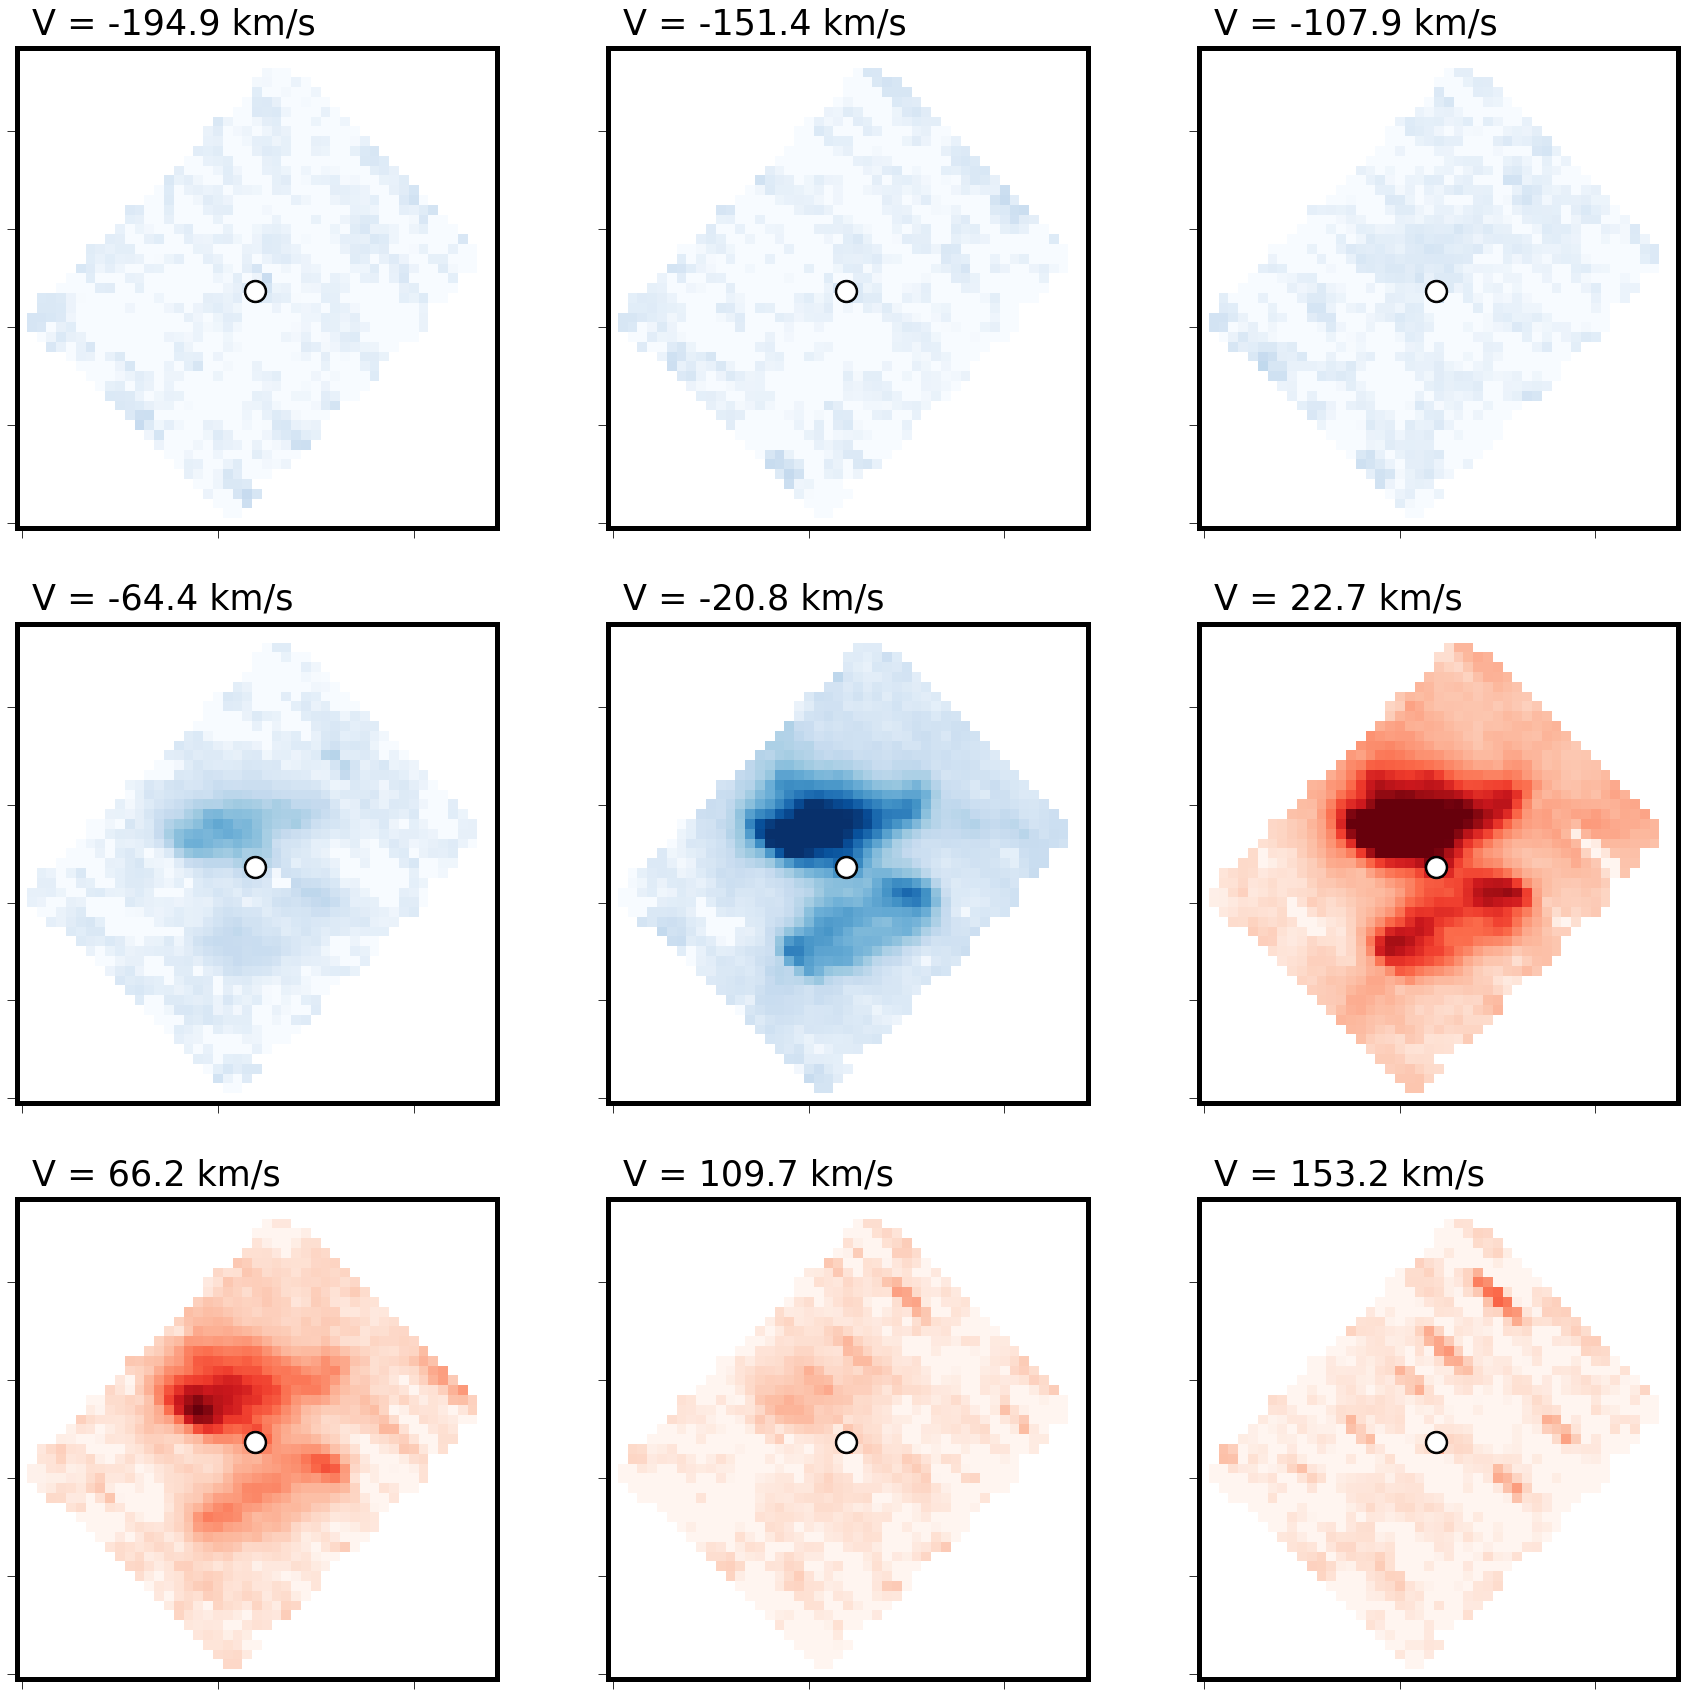

In [14]:
filename = "Level3_ch1-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
xpix, ypix,zpix = w.wcs_world2pix(RA, Dec,H1,0)

cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  


H1=5.51118318269065




w1=(1-(1.65/res))*H1
w2=(1+(1.75/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=(1-(3.5/res))*H1
w2=(1-(2.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=(1+(2.5/res))*H1
w2=(1+(3.5/res))*H1
print(w1,w2)
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)

ww=subcube.spectral_axis  

med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1

vel=((ww.to_value()-H1)/(H1))*299792

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))


i=0
k=0
norm = ImageNormalize(vmin=1,vmax=2000,stretch=SqrtStretch())

while(i<3):
    j=0
    while(j<3):
            channel = sub_f[k, :, :].to_value()
            print(i,j,k)
            ax = axs[i, j]
            if(vel[k]>0):
                im = ax.imshow(channel, origin='lower', cmap='Reds',norm=norm)
            else:
                im = ax.imshow(channel, origin='lower', cmap='Blues',norm=norm)
            ax.text(1,50,'V = {:.1f} km/s'.format(vel[k]))
            ax.scatter(xpix, ypix,c='k',s=500)
            ax.scatter(xpix, ypix,c='w',s=300)
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            j=j+1
            k=k+1
    i=i+1
        

plt.show()




8.020137147064814 8.030242754676882
8.014638507628836 8.017610745161798
8.032471932826603 8.035444170359563
0 0 0


0 1 1
0 2 2
1 0 3
1 1 4
1 2 5
2 0 6
2 1 7


2 2 8


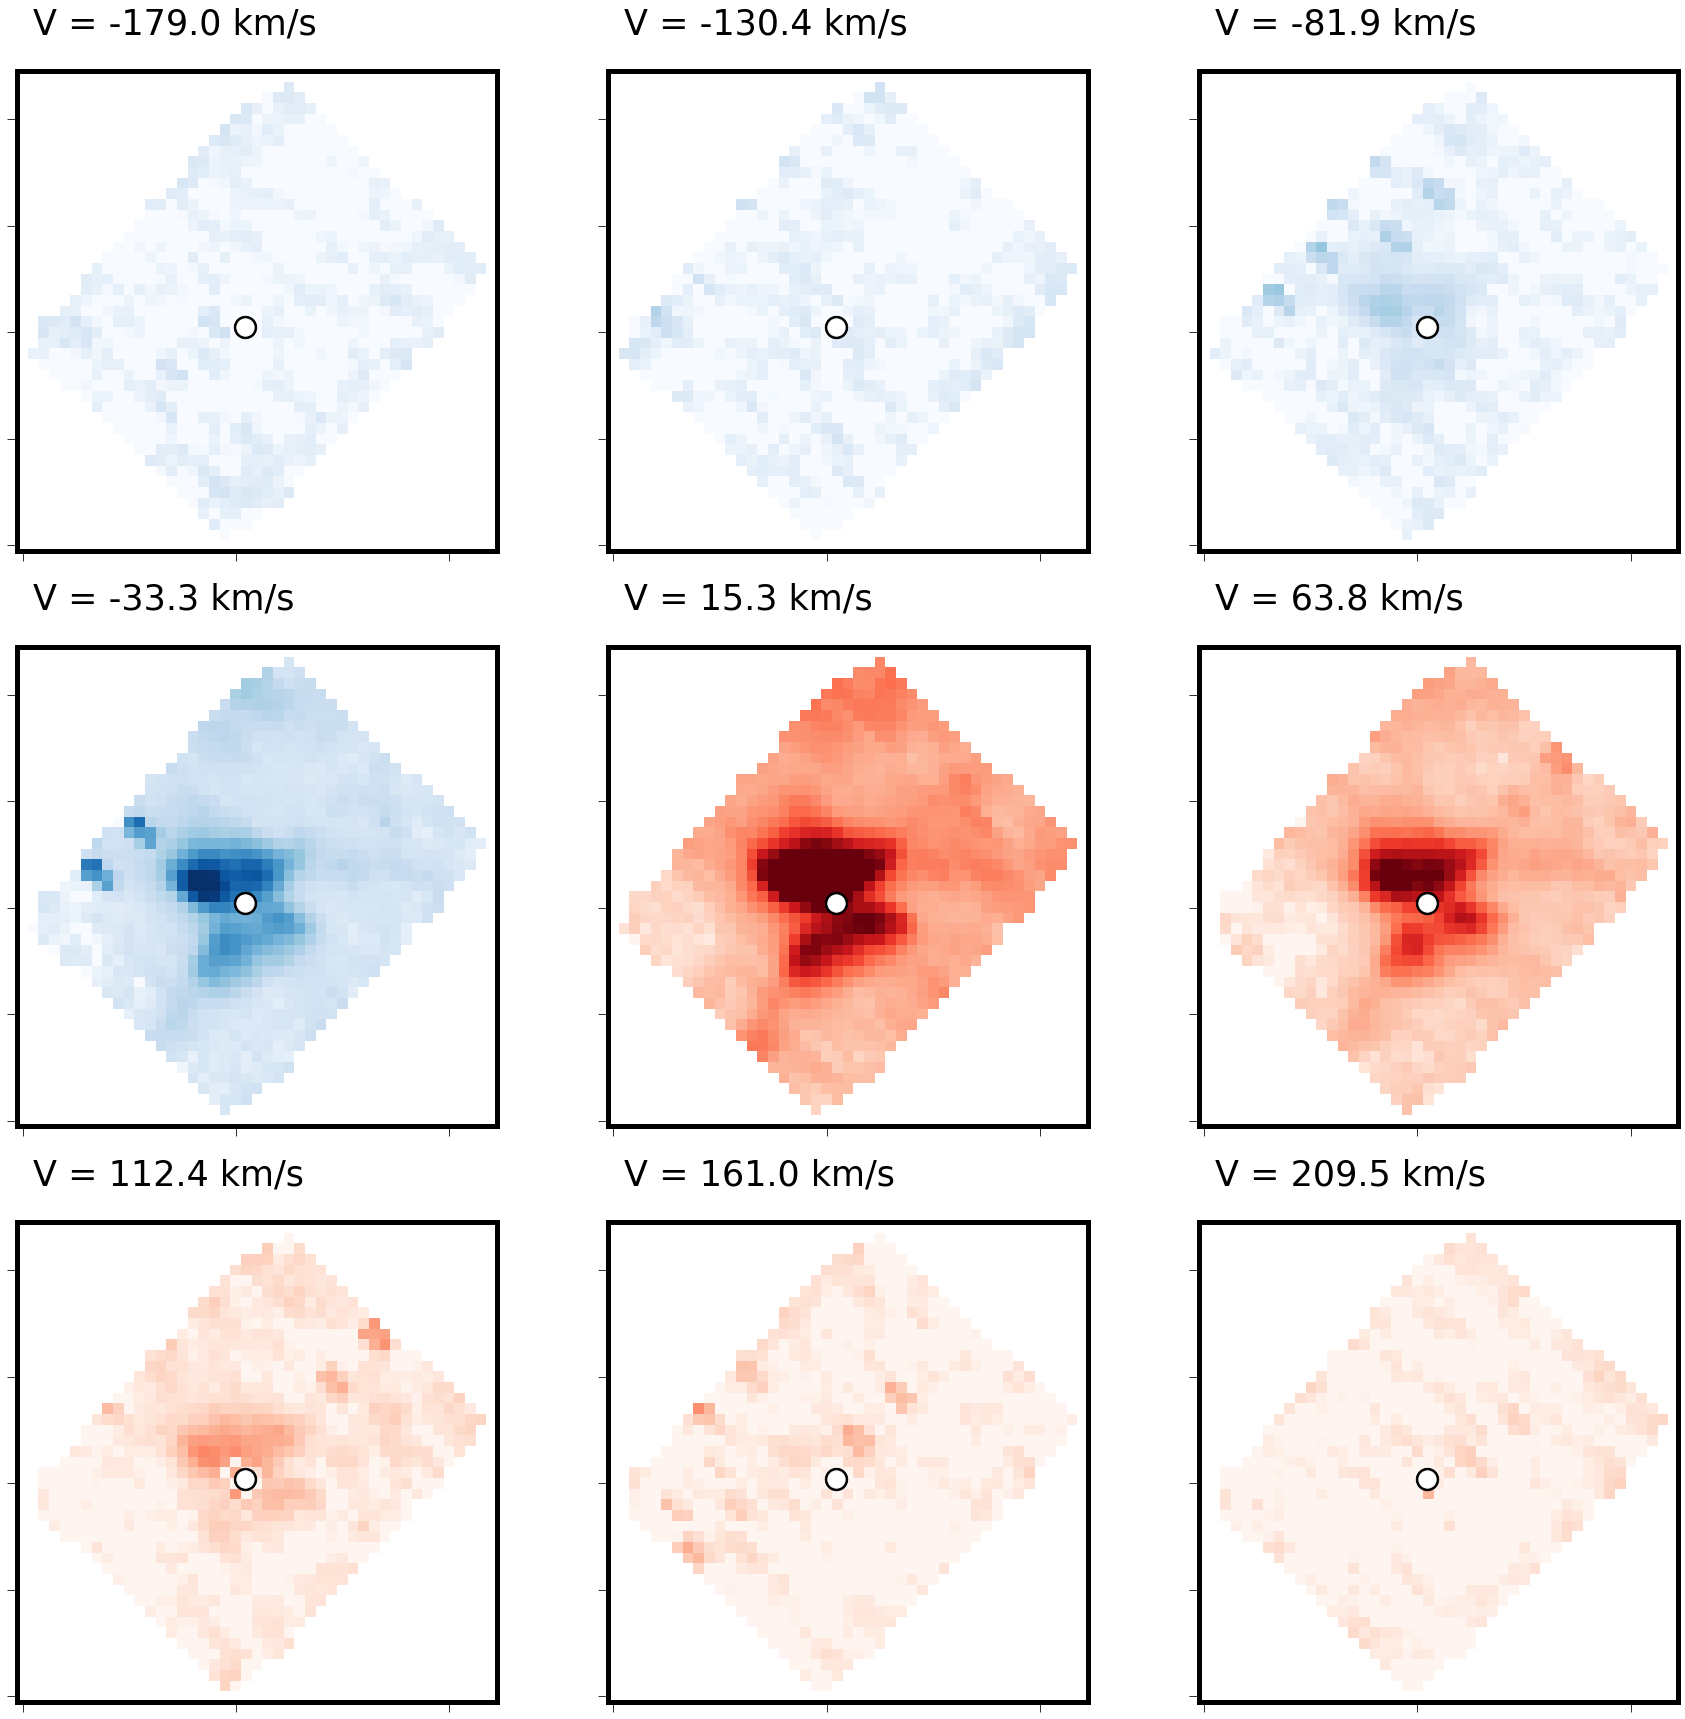

In [15]:
filename = "Level3_ch2-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
    
xpix, ypix,zpix = w.wcs_world2pix(RA, Dec,H1,0)

cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  


H1=8.0250413389942




w1=(1-(1.65/res))*H1
w2=(1+(1.75/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=(1-(3.5/res))*H1
w2=(1-(2.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=(1+(2.5/res))*H1
w2=(1+(3.5/res))*H1
print(w1,w2)
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)

ww=subcube.spectral_axis  

med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1

vel=((ww.to_value()-H1)/(H1))*299792

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))


# Show the plot

i=0
k=0

norm = ImageNormalize(vmin=1,vmax=1000,stretch=SqrtStretch())

while(i<3):
    j=0
    while(j<3):
            channel = sub_f[k, :, :].to_value()
            print(i,j,k)
            ax = axs[i, j]
            if(vel[k]>0):
                im = ax.imshow(channel, origin='lower', cmap='Reds',norm=norm)
            else:
                im = ax.imshow(channel, origin='lower', cmap='Blues',norm=norm)
            ax.text(1,48,'V = {:.1f} km/s'.format(vel[k]))
            ax.scatter(xpix, ypix,c='k',s=500)
            ax.scatter(xpix, ypix,c='w',s=300)
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            j=j+1
            k=k+1
    i=i+1
        

plt.show()




12.804055983333335 12.823039016666666
12.796937345833333 12.801683104166667
12.825411895833335 12.830157654166667
0 0 0


0 1 1
0 2 2
1 0 3
1 1 4
1 2 5
2 0 6


2 1 7
2 2 8


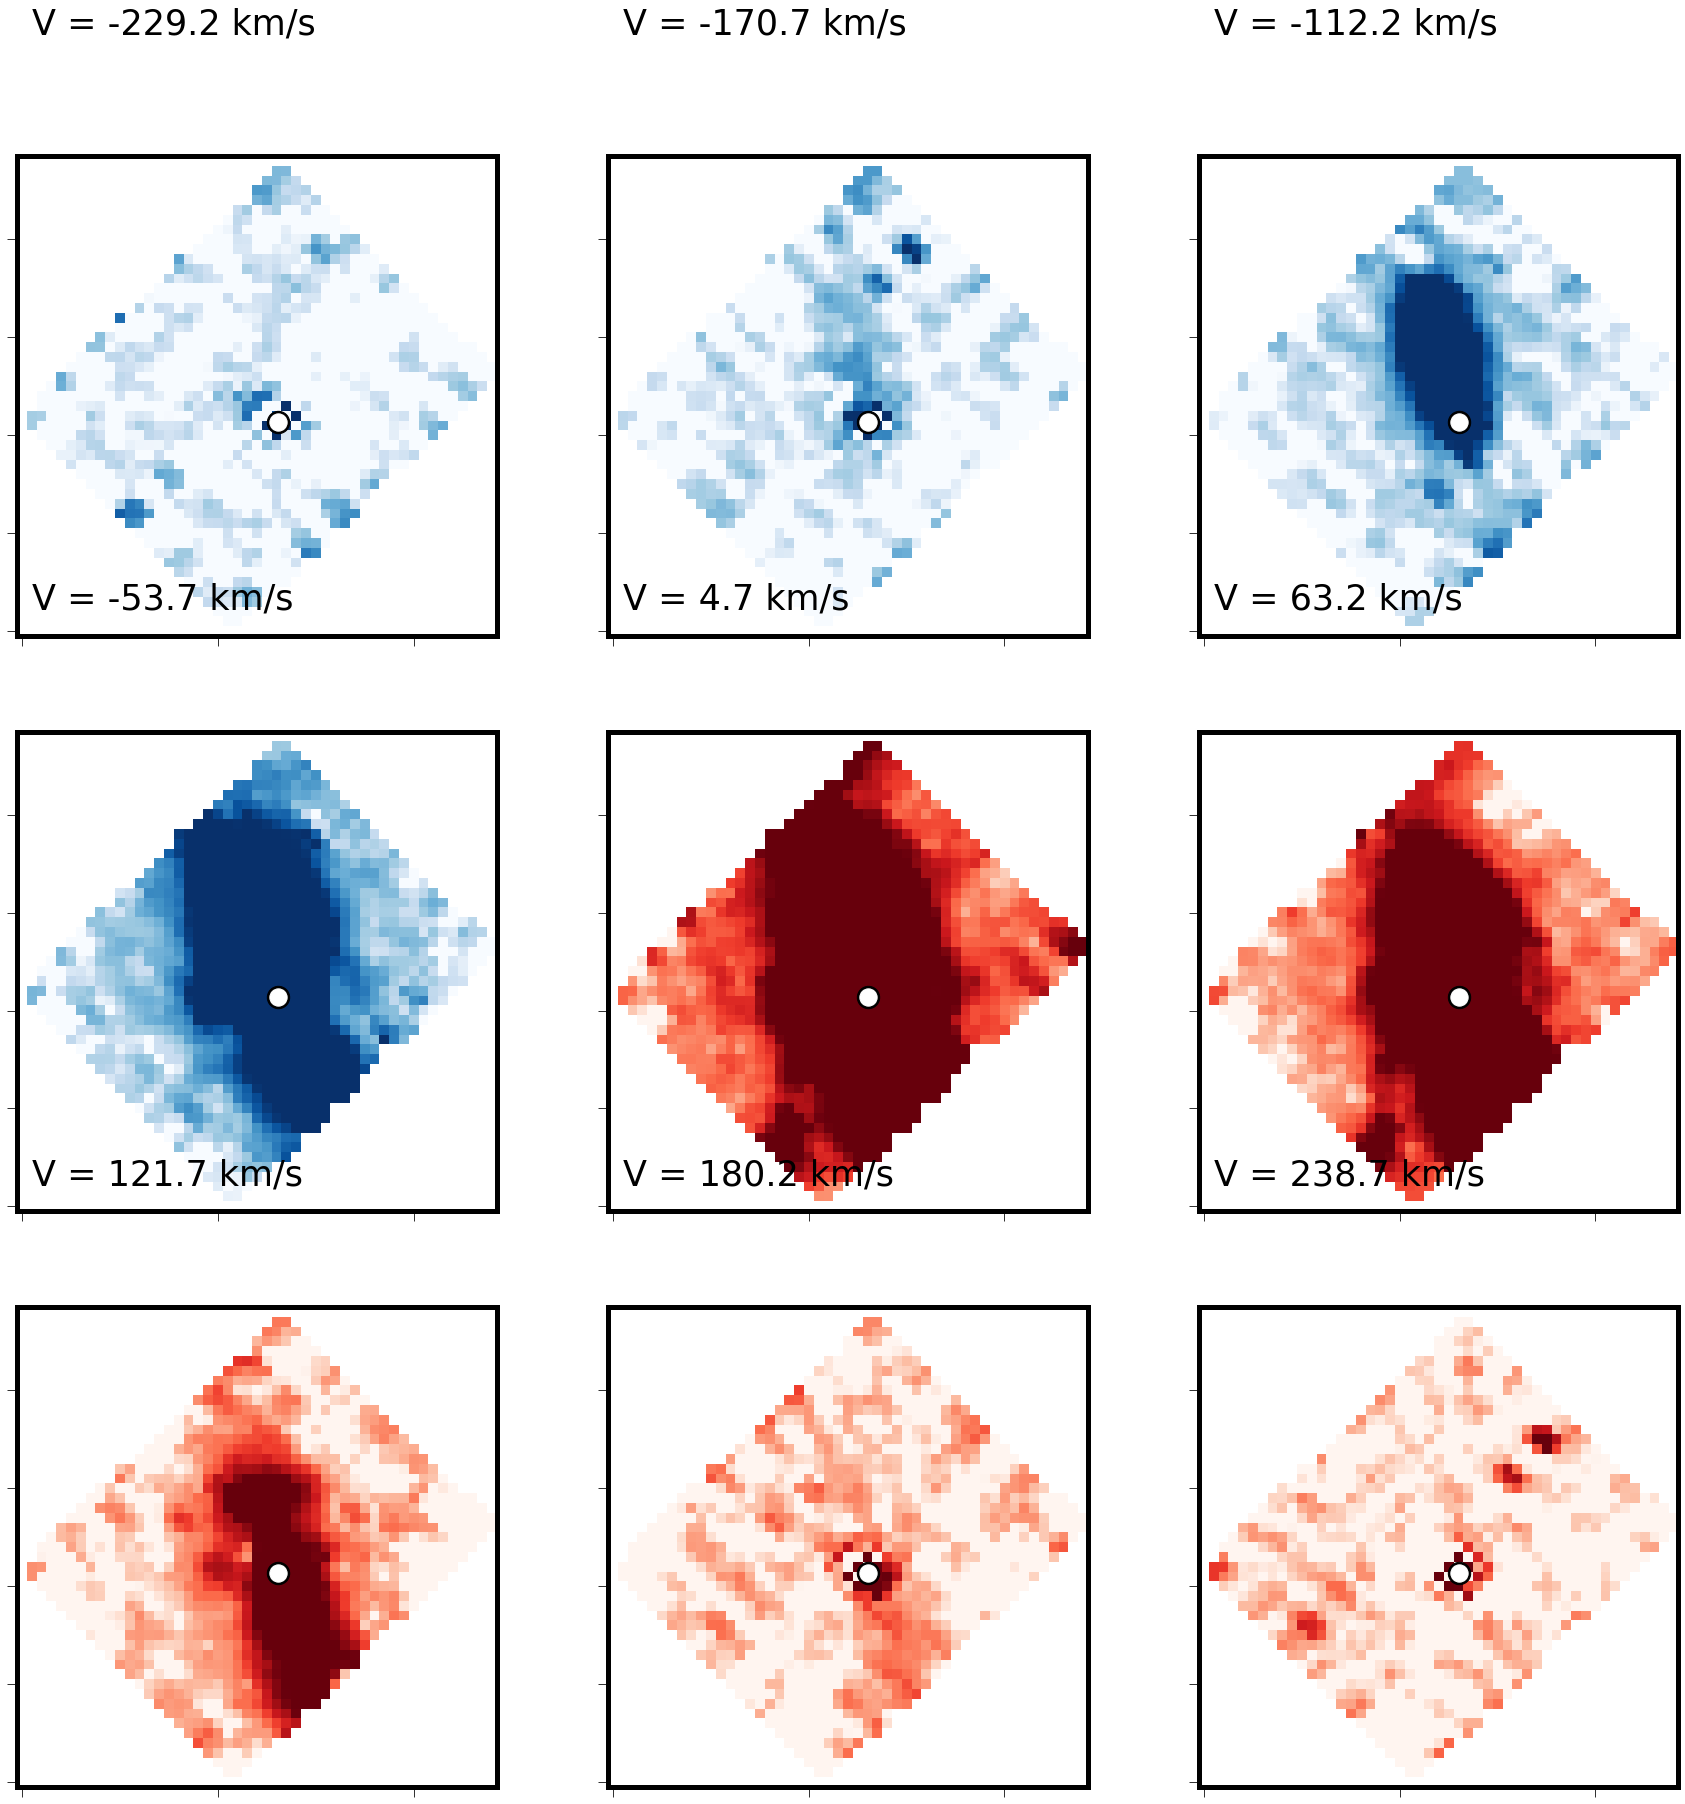

In [16]:
filename = "Level3_ch3-short_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  
 
H1=12.8135475

xpix, ypix,zpix = w.wcs_world2pix(RA, Dec,H1,0)


w1=(1-(2/res))*H1
w2=(1+(2/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=(1-(3.5/res))*H1
w2=(1-(2.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=(1+(2.5/res))*H1
w2=(1+(3.5/res))*H1
print(w1,w2)
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)

ww=subcube.spectral_axis  

med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1

vel=((ww.to_value()-H1)/(H1))*299792

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))

norm = ImageNormalize(vmin=1,vmax=50,stretch=SqrtStretch())
i=0
k=0

while(i<3):
    j=0
    while(j<3):
            channel = sub_f[k, :, :].to_value()
            print(i,j,k)
            ax = axs[i, j]
            if(vel[k]>0):
                im = ax.imshow(channel, origin='lower', cmap='Reds',norm=norm)
            else:
                im = ax.imshow(channel, origin='lower', cmap='Blues',norm=norm)
            ax.text(1,61,'V = {:.1f} km/s'.format(vel[k]))
            ax.scatter(xpix, ypix,c='k',s=500)
            ax.scatter(xpix, ypix,c='w',s=300)
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            j=j+1
            k=k+1
    i=i+1
        

plt.show()




17.916100478444445 17.955958321555553
17.906136017666665 17.912778991518515
17.959279808481483 17.965922782333333


0 0 0
0 1 1
0 2 2
0 3 3
1 0 4
1 1 5


1 2 6
1 3 7
2 0 8
2 1 9
2 2 10
2 3 11
3 0 12
3 1 13


3 2 14
3 3 15


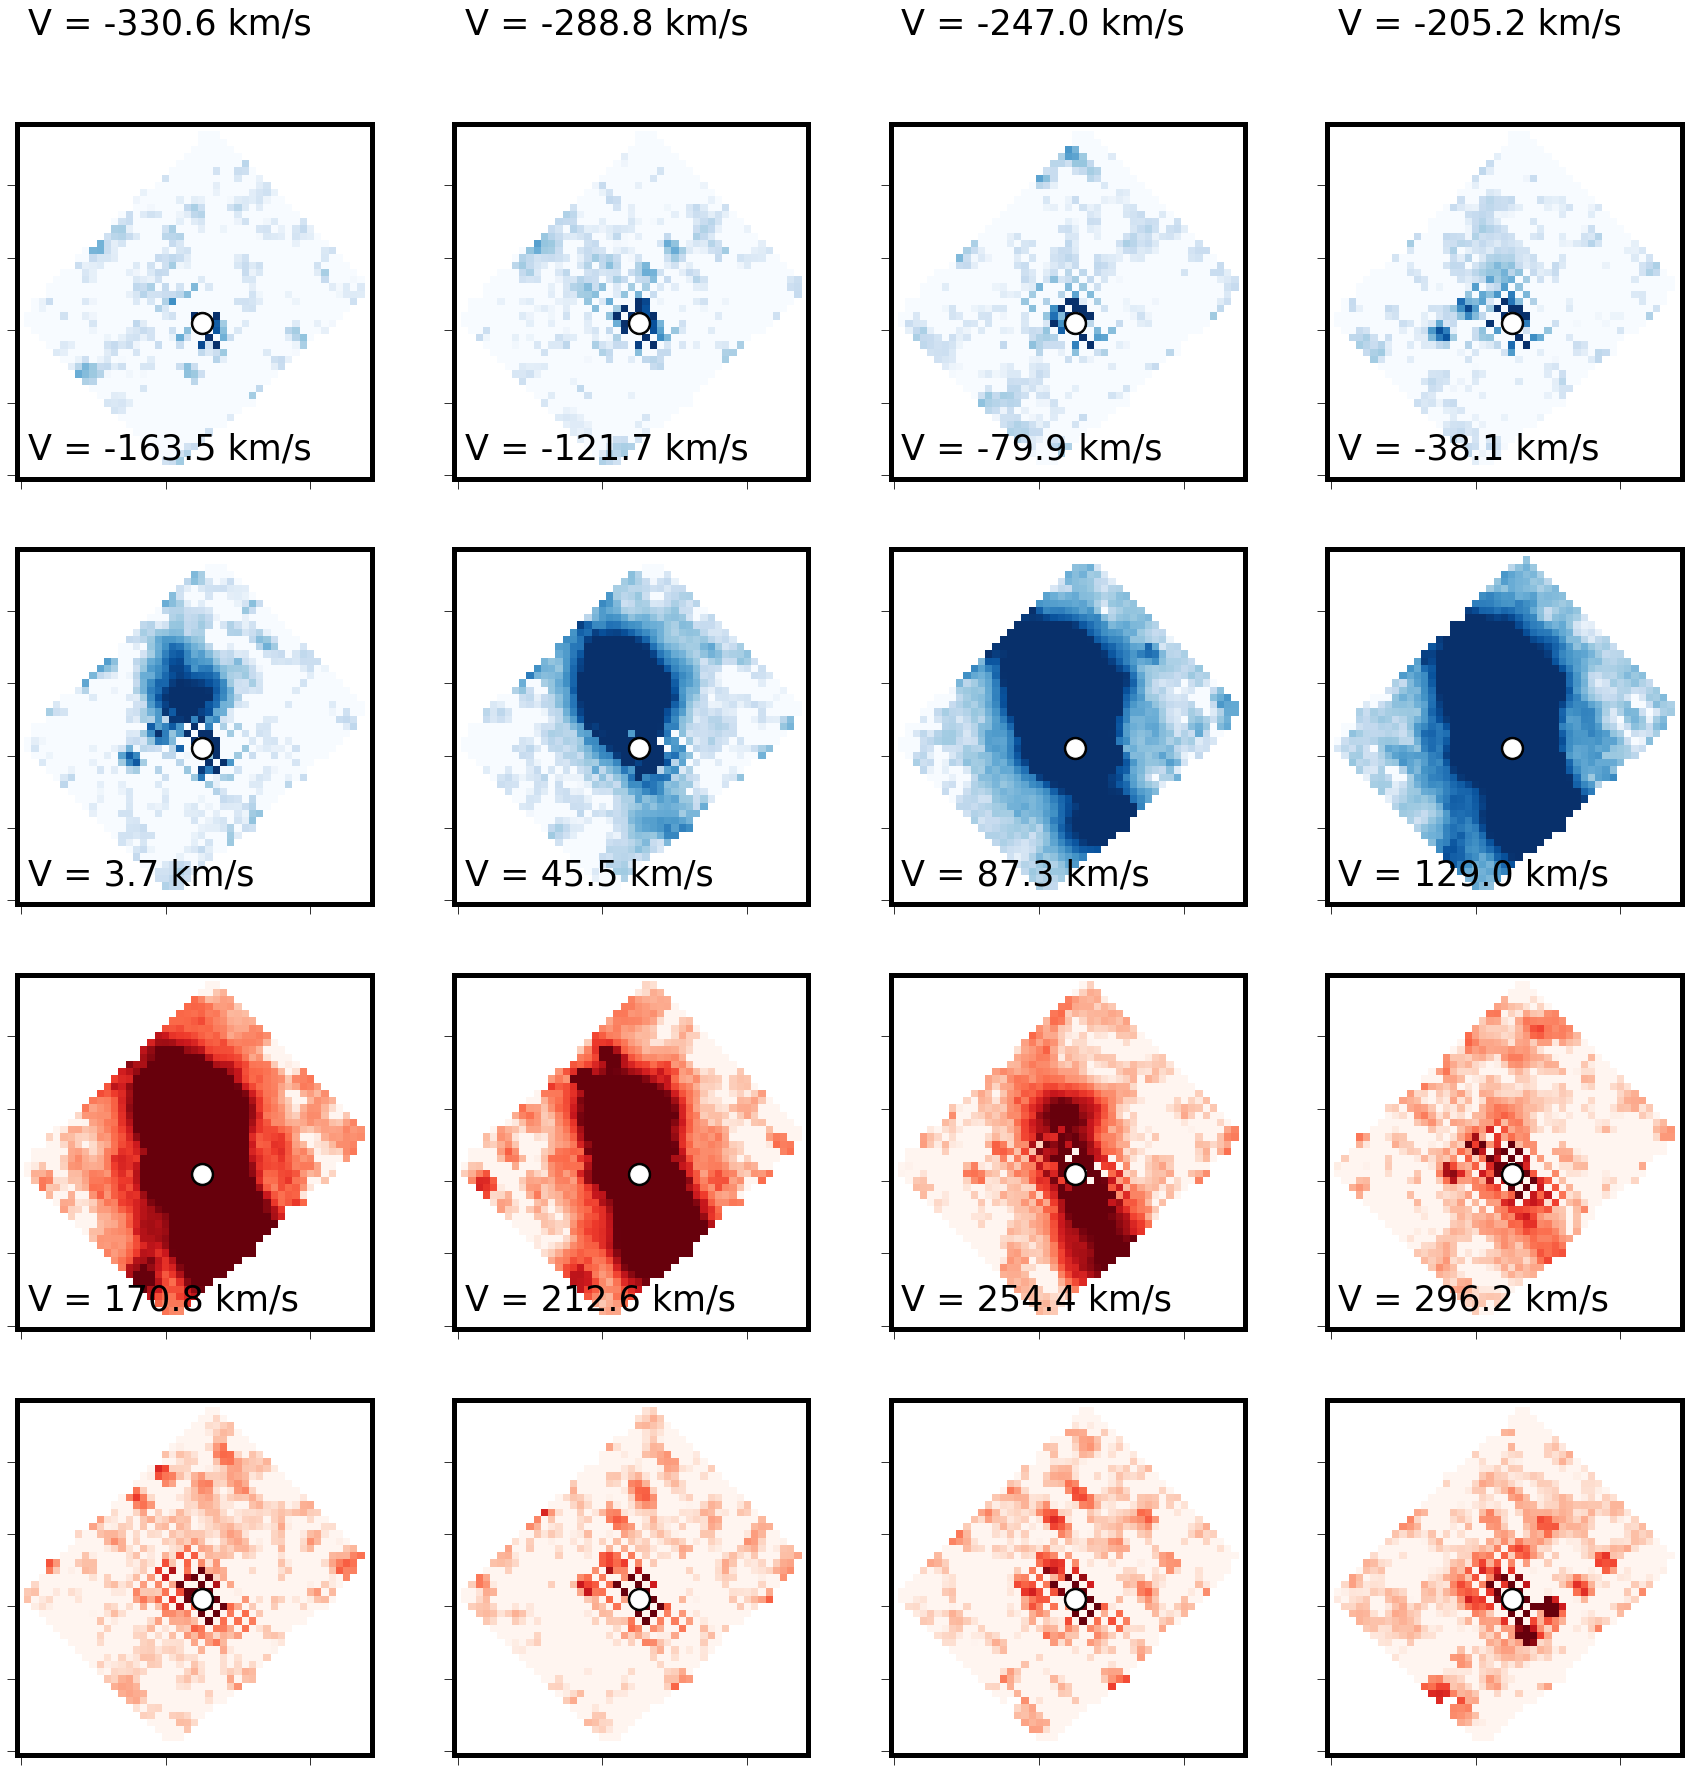

In [17]:
filename = "Level3_ch3-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  
H1=17.9360294

xpix, ypix,zpix = w.wcs_world2pix(RA, Dec,H1,0)


w1=(1-(3/res))*H1
w2=(1+(3/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=(1-(4.5/res))*H1
w2=(1-(3.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=(1+(3.5/res))*H1
w2=(1+(4.5/res))*H1
print(w1,w2)
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)

ww=subcube.spectral_axis  

med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1

vel=((ww.to_value()-H1)/(H1))*299792

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 30))

norm = ImageNormalize(vmin=1,vmax=100,stretch=SqrtStretch())

i=0
k=0



while(i<4):
    j=0
    while(j<4):
            channel = sub_f[k, :, :].to_value()
            print(i,j,k)
            ax = axs[i, j]
            if(vel[k]>0):
                im = ax.imshow(channel, origin='lower', cmap='Reds',norm=norm)
            else:
                im = ax.imshow(channel, origin='lower', cmap='Blues',norm=norm)
            ax.text(1,61,'V = {:.1f} km/s'.format(vel[k]))
            ax.scatter(xpix, ypix,c='k',s=500)
            ax.scatter(xpix, ypix,c='w',s=300)
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            j=j+1
            k=k+1
    i=i+1
        

plt.show()




25.964340662962965 26.012467337037037
25.945089993333333 25.954715328148147
26.02209267185185 26.031718006666665
0 0 0


0 1 1
0 2 2
1 0 3
1 1 4
1 2 5
2 0 6
2 1 7


2 2 8


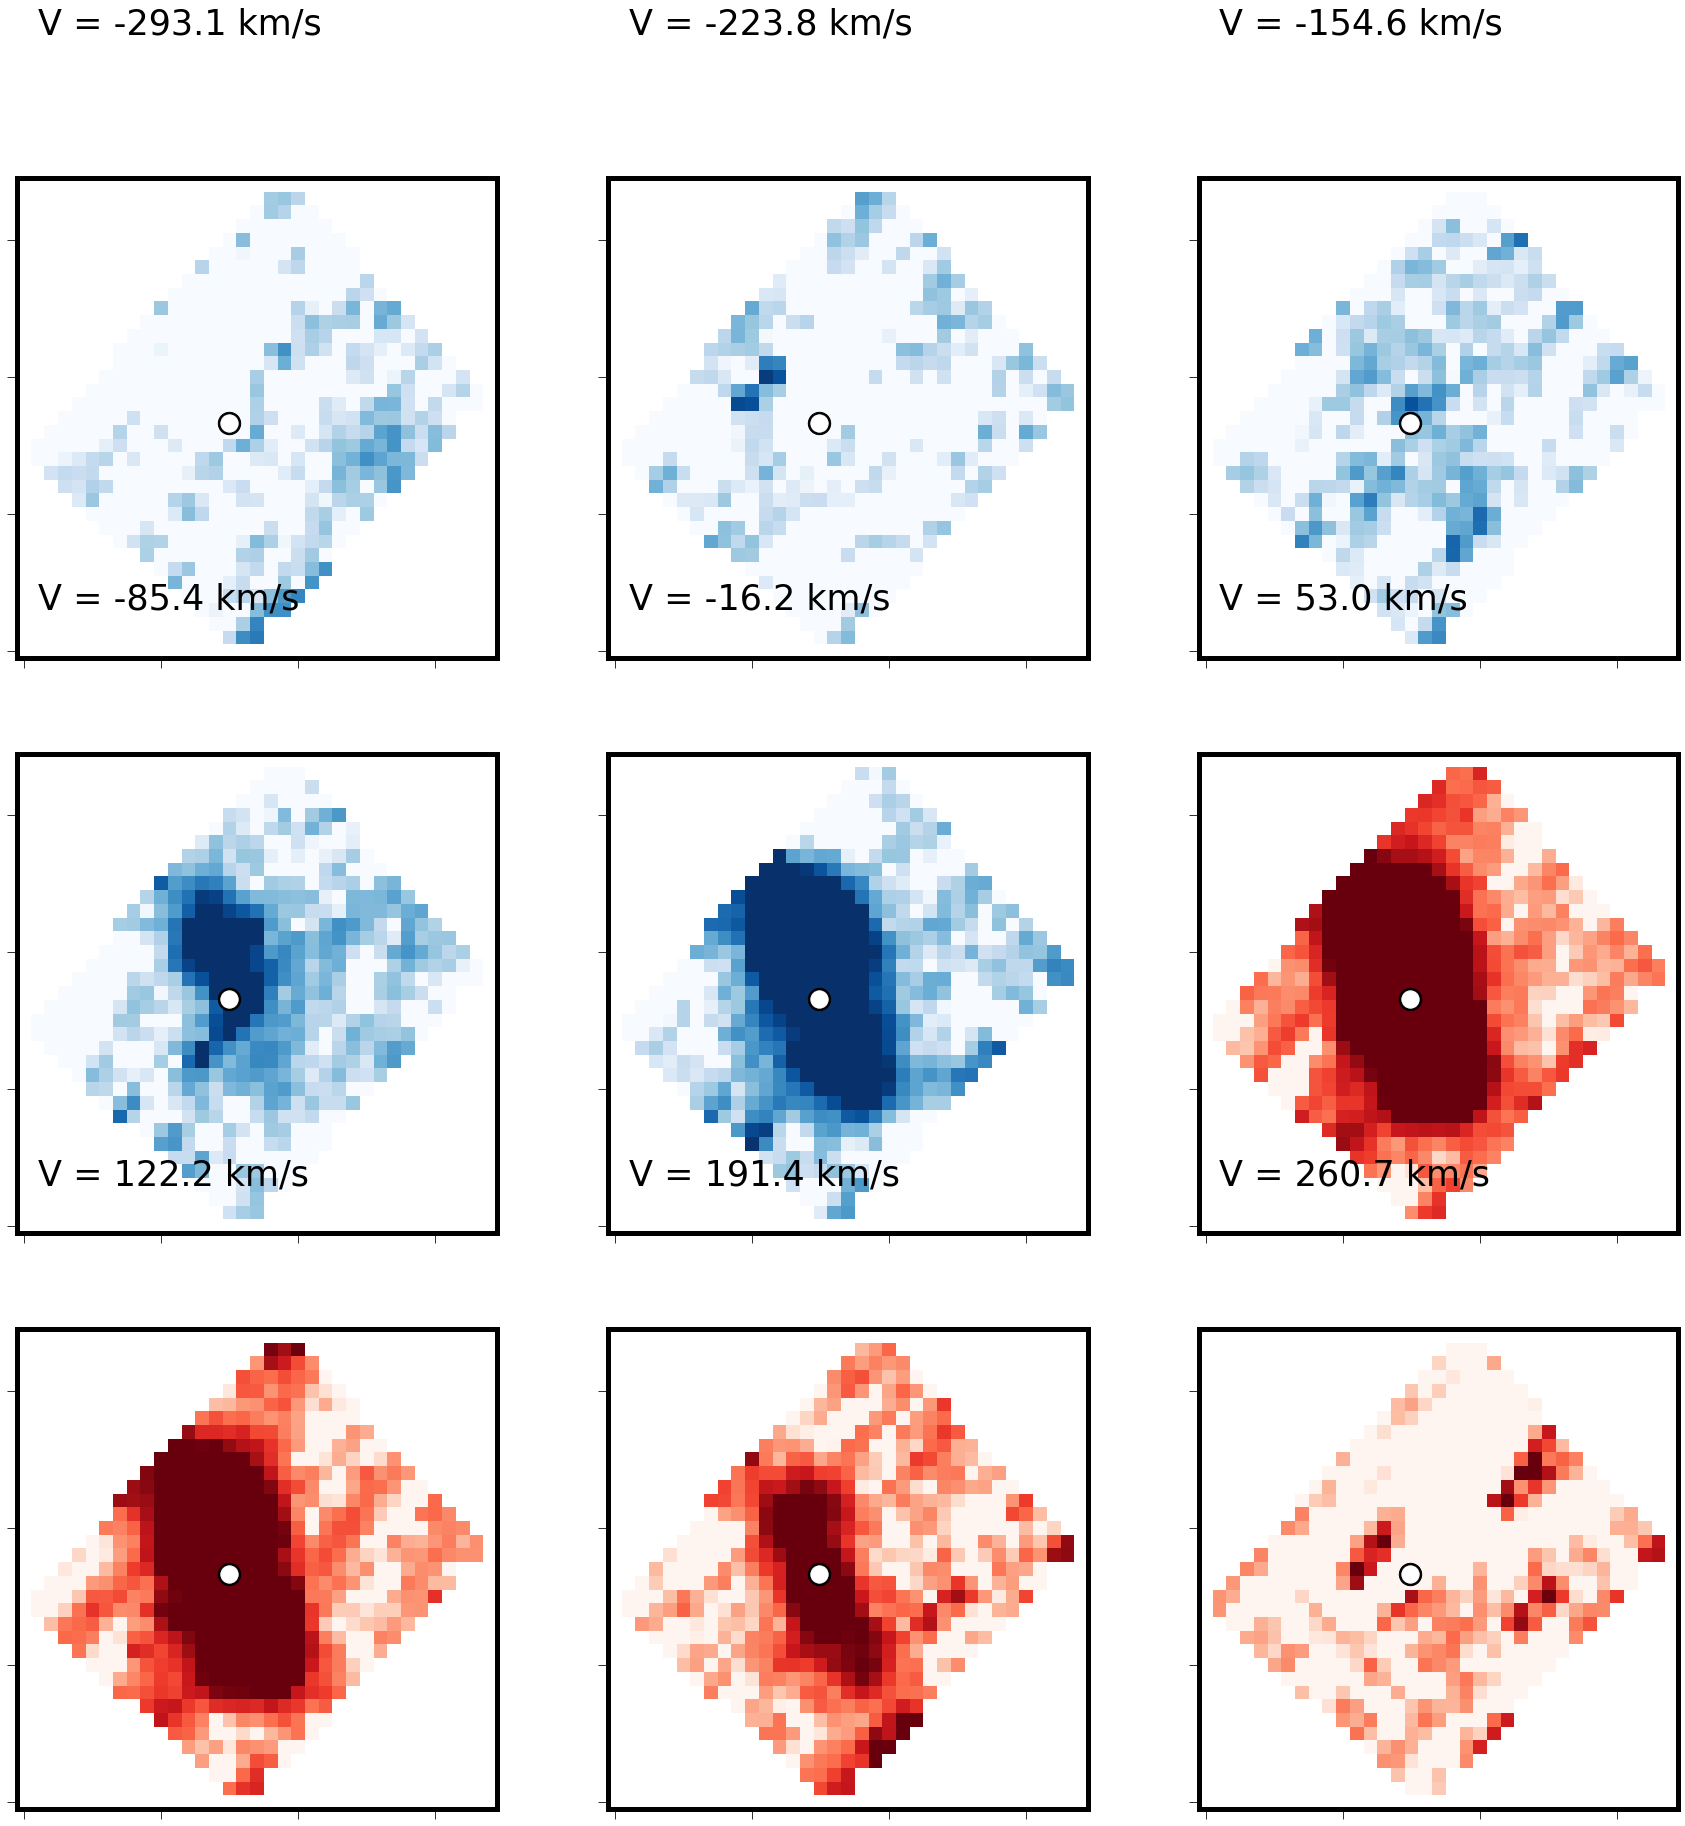

In [18]:
filename = "Level3_ch4-long_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

res=2700
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  
H1=25.988404

xpix, ypix,zpix = w.wcs_world2pix(RA, Dec,H1,0)

w1=(1-(2.5/res))*H1
w2=(1+(2.5/res))*H1
subcube = cube.spectral_slab(w1*u.micron, w2*u.micron)
print(w1,w2)
w1=(1-(4.5/res))*H1
w2=(1-(3.5/res))*H1
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med1 = subcube2.median(axis=0)  
print(w1,w2)
w1=(1+(3.5/res))*H1
w2=(1+(4.5/res))*H1
print(w1,w2)
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)

ww=subcube.spectral_axis  

med2 = subcube2.median(axis=0)  

med=(med2+med1)/2

sub_f=subcube-med
#sub_f=sub_f*-1

vel=((ww.to_value()-H1)/(H1))*299792

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))



norm = ImageNormalize(vmin=1,vmax=300,stretch=SqrtStretch())

i=0
k=0



while(i<3):
    j=0
    while(j<3):
            channel = sub_f[k, :, :].to_value()
            print(i,j,k)
            ax = axs[i, j]
            if(vel[k]>0):
                im = ax.imshow(channel, origin='lower', cmap='Reds',norm=norm)
            else:
                im = ax.imshow(channel, origin='lower', cmap='Blues',norm=norm)
            ax.text(1,45,'V = {:.1f} km/s'.format(vel[k]))
            ax.scatter(xpix, ypix,c='k',s=500)
            ax.scatter(xpix, ypix,c='w',s=300)
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            j=j+1
            k=k+1
    i=i+1
        

plt.show()


